<img src="../image/logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 16/06/2021 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***

- <b>Dados da pesquisa na base SCOPUS dia 13-06-2021</b>
- 1 - String de busca geral
<br>
458 document results
<br>
TITLE-ABS-KEY 
<br>
<b>( ( ( "natural language processing"  AND  ( "adverse drug reaction"  OR  "adverse drug event"  OR  pharmacovigilance  OR  metamap ) ) ) )  </b>
<br>
Essa string 1 contém as 2 e 3.

---------------

- 2 - String de busca inclusa na principal PARA LER E fazer Snowballing principalmente para frente
<br>
6 document results
<br>
( ( "natural language processing"  AND  ( "adverse drug reaction"  OR  "adverse drug event"  OR  pharmacovigilance ) )  AND  metamap )  

---------------

- 3 - String útil
<br>
94 document results
( "natural language processing" AND ( "adverse drug reaction" OR "adverse drug event" OR pharmacovigilance ) AND ( "social media" OR "social network" OR twitter ) )


<br>

---------------
---------------
- <b>Dados da pesquisa na base PubMEd dia 13-06-2021</b>
Mesma string da Scopus, 252 resultados


<br>


**Requisitos**
- RF01 - Analisar bases de dados
- RF02 - Remover duplicatas
- RF03 - Filtrar artigos (retirar os documentos do tipo: conference review, editorial, letter e note)
- RF04 - Identificar artigos para leitura de resumo e conclusão
- RF05 - Identificar artigos para leitura completa
- RF06 - Instalar nova versão do Metamap e DFB
- RF07 - New mail do Will

<b>Site do projeto:</b> https:git.com
<br>
**Endereço da dissertação:** https://pt.overleaf.com/project/60731ca2bcfa0afce8ae0cd1

---

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os, re
import sys
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from unidecode import unidecode
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(data_inicio)

2021-06-19 00:57:15.794591


In [3]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas-16-06-2021.xlsx',
 'bases_filtradas-v0.xlsx',
 'bases_filtradas-v002.xlsx',
 'bases_filtradas-v003.xlsx',
 'bases_filtradas-v004.xlsx',
 'bases_filtradas-v005.xlsx',
 'bases_filtradas-v007.xlsx',
 'bases_filtradas.xlsx',
 'bases_filtradas_e_qualis.xlsx',
 'classificacao_qualis_06-06-2021.xls',
 'Evaluation-of-Natural-Language-Processing-NLP-systems-to-annotate-drug-product-labeling-with-MedDRA-terminologyJournal-of-Biomedical-Informatics.pdf',
 'pubmed-10-06-2021.csv',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'resultado_dfs.xlsx',
 'resultado_geral.xlsx',
 'resultado_geral_06-06-2021.xlsx',
 'resultado_pubmed-18-06-2021.xlsx',
 'resultado_pubmed.xlsx',
 'resultado_scopus-16-06-2021.xlsx',
 'resultado_scopus-18-06-2021.xlsx',
 'resultado_scopus-luciana-12-06-2021-v2.xlsx',
 'resultado_scopus-luciana-12-06-2021.xlsx',
 'resultado_scopus-luciana.xlsx',
 'resultado_scopus-v1.xlsx',
 'resultado_s

In [4]:
os.listdir('../Image')

['logo-cefet.png', 'Logo_CVM.png', 'puc-rio-logo.png', 'wordcloud.pdf']

## Verificar, atualizar e instalar se necessário python e módulos 

# Preparar e carregar base de dados

## Carregar Planilha - Base Qualis

In [5]:
print('Carregando pesquisa realizada na base Scopus.')
'''
Fonte: https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/veiculoPublicacaoQualis/listaConsultaGeralPeriodicos.jsf
Periódico do quadriênio 2013-2016
'''
arquivo_base_qualis = os.path.join('../data','base-qualis-06-06-2021.xlsx')
raw_data_qualis = pd.read_excel(arquivo_base_qualis)
raw_data_qualis

Carregando pesquisa realizada na base Scopus.


,ISSN,Título,Área de Avaliação,Estrato
0,1981-030X,19&20 (RIO DE JANEIRO),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",C
1,2236-6695,A BARRIGUDA: REVISTA CIENTÍFICA,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
2,1413-6090,A ECONOMIA EM REVISTA,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
3,1516-3210,A&C. REVISTA DE DIREITO ADMINISTRATIVO & CONST...,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
4,0001-3072,ABACUS (SYDNEY. PRINT),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",A2
...,...,...,...,...
131269,1175-5326,ZOOTAXA (AUCKLAND. PRINT),ZOOTECNIA / RECURSOS PESQUEIROS ...,B1
131270,1175-5334,ZOOTAXA (ONLINE),ZOOTECNIA / RECURSOS PESQUEIROS ...,B1
131271,2358-3576,ZOOTECNIA,ZOOTECNIA / RECURSOS PESQUEIROS ...,C
131272,0798-7269,ZOOTECNIA TROPICAL - FONAIAP,ZOOTECNIA / RECURSOS PESQUEIROS ...,B3


## Carregar CSV - Scopus

In [6]:
print('Visualização do dataframe carregado da base scopus.')
arquivo_base_scopus = os.path.join('../data','scopus.csv')
raw_data_scopus = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_scopus.head()

Visualização do dataframe carregado da base scopus.


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Zhang F., Sun B., Diao X., Zhao W., Shu T.",57221913449;57221919849;57202804485;5719859752...,Prediction of adverse drug reactions based on ...,2021,BMC Medical Informatics and Decision Making,21,1,38,NaN,NaN,...,NaN,NaN,33541342.0,English,BMC Med. Informatics Decis. Mak.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85100558743
1,"Shen C., Li Z., Chu Y., Zhao Z.",57206995169;57213179826;57191405659;56171564000;,GAR: Graph adversarial representation for adve...,2021,Applied Soft Computing,106,NaN,107324,NaN,NaN,...,NaN,NaN,NaN,English,Appl. Soft Comput.,Article,Final,NaN,Scopus,2-s2.0-85103114472
2,"Shannon G.J., Rayapati N., Corns S.M., Wunsch ...",56275865000;57219795472;6506365939;7006706193;,Comparative study using inverse ontology cogen...,2021,Neural Networks,139,NaN,NaN,86,104,...,NaN,NNETE,33684612.0,English,Neural Netw.,Article,Final,NaN,Scopus,2-s2.0-85102081027
3,"Allam N., Audeh B., Jaulent M.-C., Bousquet C.",57224206480;55452137800;7003346504;8609880700;,Visualising Patterns Associated with Adverse D...,2021,Studies in health technology and informatics,281,NaN,NaN,1110,1111,...,NaN,NaN,34042861.0,English,Stud Health Technol Inform,Article,Final,"All Open Access, Hybrid Gold",Scopus,2-s2.0-85107238693
4,"El-allaly E.-D., Sarrouti M., En-Nahnahi N., O...",57207994980;57170906800;57221862377;55891723400;,MTTLADE: A multi-task transfer learning-based ...,2021,Information Processing and Management,58,3,102473,NaN,NaN,...,NaN,IPMAD,NaN,English,Inf. Process. Manage.,Article,Final,NaN,Scopus,2-s2.0-85100465366


## Carregar CSV - PubMed

In [ ]:


print('Carga e Visualização do dataframe')
arquivo_base_pubmed = os.path.join('../data','pubmed.csv')
raw_data_pubmed = pd.read_csv(arquivo_base_pubmed, sep=",", delimiter=None, encoding='utf-8')
raw_data_pubmed.head()

## Analisar dados brutos original


### Analisando base SCOPUS

In [8]:
## aumentar quantidade de exibição de caracteres em uma coluna
pd.set_option("max_colwidth", 200)

In [9]:
print('Verificando tipos e se tem dados nulos')
raw_data_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        458 non-null    object 
 1   Author(s) ID                   458 non-null    object 
 2   Title                          458 non-null    object 
 3   Year                           458 non-null    int64  
 4   Source title                   458 non-null    object 
 5   Volume                         393 non-null    object 
 6   Issue                          202 non-null    object 
 7   Art. No.                       109 non-null    object 
 8   Page start                     359 non-null    object 
 9   Page end                       348 non-null    object 
 10  Page count                     3 non-null      float64
 11  Cited by                       378 non-null    float64
 12  DOI        

In [10]:
raw_data_scopus.nunique()

Authors                          443
Author(s) ID                     441
Title                            456
Year                              22
Source title                     155
Volume                           172
Issue                             36
Art. No.                         106
Page start                       285
Page end                         295
Page count                         3
Cited by                          71
DOI                              379
Link                             458
Affiliations                     446
Authors with affiliations        453
Abstract                         448
Author Keywords                  318
Index Keywords                   417
Molecular Sequence Numbers         0
Chemicals/CAS                     73
Tradenames                        17
Manufacturers                      1
Funding Details                  209
Funding Text 1                   183
Funding Text 2                    21
Funding Text 3                     1
R

In [11]:
# verificar campos nulos
raw_data_scopus.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            65
Issue                            256
Art. No.                         349
Page start                        99
Page end                         110
Page count                       455
Cited by                          80
DOI                               79
Link                               0
Affiliations                       4
Authors with affiliations          3
Abstract                           0
Author Keywords                  140
Index Keywords                    41
Molecular Sequence Numbers       458
Chemicals/CAS                    362
Tradenames                       439
Manufacturers                    457
Funding Details                  237
Funding Text 1                   275
Funding Text 2                   437
Funding Text 3                   457
R

### Analisando base Qualis

In [12]:
print('Verificando tipos e se tem dados nulos')
raw_data_qualis.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131274 entries, 0 to 131273
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISSN               131271 non-null  object
 1   Título             131274 non-null  object
 2   Área de Avaliação  131274 non-null  object
 3   Estrato            131274 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


In [13]:
raw_data_qualis.nunique()

ISSN                 27618
Título               29838
Área de Avaliação       49
Estrato                  8
dtype: int64

In [14]:
raw_data_qualis.isnull().sum()

ISSN                 3
Título               0
Área de Avaliação    0
Estrato              0
dtype: int64

### Analisando base PUBMED

In [15]:
print('Verificando tipos e se tem dados nulos')
raw_data_pubmed.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PMID              252 non-null    int64 
 1   Title             252 non-null    object
 2   Authors           252 non-null    object
 3   Citation          252 non-null    object
 4   First Author      252 non-null    object
 5   Journal/Book      252 non-null    object
 6   Publication Year  252 non-null    int64 
 7   Create Date       252 non-null    object
 8   PMCID             157 non-null    object
 9   NIHMS ID          26 non-null     object
 10  DOI               181 non-null    object
dtypes: int64(2), object(9)
memory usage: 21.8+ KB


In [16]:
raw_data_pubmed.nunique()

PMID                252
Title               251
Authors             248
Citation            252
First Author        215
Journal/Book         61
Publication Year     21
Create Date         204
PMCID               157
NIHMS ID             26
DOI                 181
dtype: int64

In [17]:
# verificar campos nulos
raw_data_pubmed.isnull().sum()

PMID                  0
Title                 0
Authors               0
Citation              0
First Author          0
Journal/Book          0
Publication Year      0
Create Date           0
PMCID                95
NIHMS ID            226
DOI                  71
dtype: int64

## Copiar dataframe para ajustes

In [18]:
## Verificar se os dataframes nao s"ao espelhos
df_scopus = raw_data_scopus.copy()
df_qualis = raw_data_qualis.copy()
df_pubmed = raw_data_pubmed.copy()

print(id(df_scopus),id(df_qualis), id(df_pubmed), id(raw_data_scopus),id(raw_data_qualis), id(raw_data_pubmed))

1592940386696 1592940637192 1592941007688 1593007812936 1592934214344 1593007997640


# Dataframe SCOPUS

## Ajustar de Colunas

### Alterar nome de Colunas

In [19]:
print('Verificar colunas')
df_scopus.columns

Verificar colunas


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [20]:
columns_scopus = {
    'Authors':'autores_scopus',
    'Author(s) ID':'id_autores',
    'Title':'titulo_artigo',
    'Year':'ano_publicacao_scopus',
    'Source title':'titulo_fonte',
    'Volume':'volume',
    'Issue':'publicado',
    'Art. No.':'numero_artigo',
    'Page start':'inicio_pagina',
    'Page end':'fim_pagina', 
    'Page count':'quantidade_paginas',
    'Cited by':'quantidade_citacoes',
    'DOI':'doi_scopus',
    'Link':'link_scopus',
    'Affiliations':'afiliacoes',
    'Authors with affiliations':'autores_com_filiacoes',
    'Abstract':'resumo',
    'Author Keywords':'palavras_chaves_autor',
    'Index Keywords':'palavras_chave_index',
    'Molecular Sequence Numbers':'numeros_sequencia_molecular' ,
    'Chemicals/CAS':'quimica',
    'Tradenames':'nomes_comerciais',
    'Manufacturers':'fabricantes',
    'Funding Details':'detalhes_financiamento',
    'Funding Text 1':'texto_financiamento_1',
    'Funding Text 2':'texto_financiamento_2',
    'Funding Text 3':'texto_financiamento_3',
    'References':'referencias',
    'Correspondence Address':'endereco_correspondencia',
    'Editors':'editores',
    'Sponsors':'patrocinadores',
    'Publisher':'editor',
    'Conference name':'nome_conferencia',
    'Conference date':'data_conferencia',
    'Conference location':'local_conferencia',
    'Conference code':'codigo_conferencia',
    'ISSN':'issn_scopus',
    'ISBN':'isbn',
    'CODEN':'coden',
    'PubMed ID':'id_pubmed',
    'Language of Original Document':'idioma_original',
    'Abbreviated Source Title':'titulo_abreviado_fonte',
    'Document Type':'tipo_documento',
    'Publication Stage':'etapa_publicacao',
    'Open Access':'acesso_livre',
    'Source':'fonte',
    'EID':'eid',
}

In [21]:
df_scopus = df_scopus.rename(columns=columns_scopus)
df_scopus.head(1)

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,isbn,coden,id_pubmed,idioma_original,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid
0,"Zhang F., Sun B., Diao X., Zhao W., Shu T.",57221913449;57221919849;57202804485;57198597529;55641261200;,Prediction of adverse drug reactions based on knowledge graph embedding,2021,BMC Medical Informatics and Decision Making,21,1,38,NaN,NaN,...,NaN,NaN,33541342.0,English,BMC Med. Informatics Decis. Mak.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85100558743


### Ajustar / Criar colunas de Páginas

In [22]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata junto com título
df_scopus["doi"] = df_scopus["doi_scopus"]

In [23]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata 
df_scopus["titulo_artigo_scopus"] = df_scopus["titulo_artigo"]

In [24]:
## Criar novas colunas de paginas e + uma para calcular qtde paginas
df_scopus["inicio_pagina_"] = df_scopus["inicio_pagina"]
df_scopus["fim_pagina_"] = df_scopus["fim_pagina"]

In [25]:
## Expressao que pega só dígitos
r = re.compile(r'\D')

In [26]:
df_scopus.inicio_pagina_.replace(r, '', regex = True, inplace=True)
df_scopus.fim_pagina_.replace(r, '', regex = True, inplace=True)

In [27]:
print('Ajustar tipagem dos dados')
df_scopus['inicio_pagina_'] = df_scopus['inicio_pagina_'].astype('float64')
df_scopus['fim_pagina_'] = df_scopus['fim_pagina_'].astype('float64')

Ajustar tipagem dos dados


In [28]:
df_scopus['quantidade_paginas_'] = df_scopus['fim_pagina_'] - df_scopus['inicio_pagina_']

In [29]:
df_scopus.sort_values('quantidade_paginas_',ascending=False, )[['issn_scopus','quantidade_paginas_']]

,issn_scopus,quantidade_paginas_
42,22132198,9349.0
205,22132198,6696.0
329,NaN,263.0
223,03029743,131.0
111,18650929,26.0
...,...,...
429,1942597X,NaN
430,1942597X,NaN
433,15594076,NaN
438,14712105,NaN


### Criar nova coluna com data de conferencia

## Colunas para lower

In [30]:
## Passar colunas a serem trabalhadas para lower case
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].str.lower()
df_scopus["resumo"] = df_scopus["resumo"].str.lower()
df_scopus["doi"] = df_scopus["doi"].str.lower()

In [31]:
df_scopus[["resumo", "titulo_artigo"]]

,resumo,titulo_artigo
0,background: adverse drug reactions (adrs) are an important concern in the medication process and can pose a substantial economic burden for patients and hospitals. because of the limitations of cl...,prediction of adverse drug reactions based on knowledge graph embedding
1,adverse drug reaction events have become one of the main causes of patient death. since traditional post-marketing surveillance systems based on spontaneous reports have a serious underreporting i...,gar: graph adversarial representation for adverse drug event detection on twitter
2,"this paper introduces inverse ontology cogency, a concept recognition process and distance function that is biologically-inspired and competitive with alternative methods. the paper introduces inv...",comparative study using inverse ontology cogency and alternatives for concept recognition in the annotated national library of medicine database
3,"as social media are an interesting source of information for pharmacovigilance, we implemented a novel visualisation method for pharmacovigilance specialists applied to french discussion forums. a...",visualising patterns associated with adverse drug reactions in french forums
4,extracting mentions of adverse drug events (ades) and the potential relationships among them from clinical textual data remains challenging tasks due to the following issues: (1) many ades mention...,mttlade: a multi-task transfer learning-based method for adverse drug events extraction
...,...,...
453,"although huge amounts of unstructured text are available as a rich source of biomedical knowledge, to process this unstructured knowledge requires tools that identify concepts from free-form text....",a study of biomedical concept identification: metamap vs. people.
454,the purpose of this project is to explore the feasibility of detecting terms within the electronic messages of patients that could be used to effectively search electronic knowledge resources and ...,towards linking patients and clinical information: detecting umls concepts in e-mail
455,"the umls metathesaurus, the largest thesaurus in the biomedical domain, provides a representation of biomedical knowledge consisting of concepts classified by semantic type and both hierarchical a...",effective mapping of biomedical text to the umls metathesaurus: the metamap program.
456,the medical dictionary for regulatory activities terminology (meddra) version 2.1 (v2.1) was released in march 1999 accompanied by the meddra/j v2.1j specifically for japanese users. in prescripti...,the use of a medical dictionary for regulatory activities terminology (meddra) in prescription-event monitoring in japan (j-pem)


## Remover caracteres especiais

In [32]:
df_scopus.query('id_pubmed == "24551335" ')

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
345,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings.,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266.0,NaN,NaN


In [33]:
## Caracateres especiais tem q ficar acima da funcaio limpar
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [34]:
df_scopus.query('id_pubmed == "11825149" ')

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
455,Aronson A.R.,17933416200;,effective mapping of biomedical text to the umls metathesaurus the metamap program,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,Article,Final,NaN,Scopus,2-s2.0-0035752429,NaN,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,17.0,21.0,4.0


In [35]:
def limpar_campo(s):
    return re.sub(r'[\u00a0 .M]', ' ', s)

In [36]:
df_scopus.loc[:,'titulo_artigo'] = df_scopus['titulo_artigo'].apply(limpar_campo)

In [37]:
df_scopus['titulo_artigo'] = df_scopus['titulo_artigo'].str.replace('  ', ' ')

In [38]:
df_scopus.query('id_pubmed == "11825149" ')

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
455,Aronson A.R.,17933416200;,effective mapping of biomedical text to the umls metathesaurus the metamap program,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,Article,Final,NaN,Scopus,2-s2.0-0035752429,NaN,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,17.0,21.0,4.0


In [39]:
df_scopus.query('id_pubmed == "24551335" ')

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
345,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266.0,NaN,NaN


In [40]:
df_scopus.query('id_pubmed == "24551335" ')

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
345,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266.0,NaN,NaN


In [41]:
df_scopus.query('id_pubmed == "11825149" ')

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_,quantidade_paginas_
455,Aronson A.R.,17933416200;,effective mapping of biomedical text to the umls metathesaurus the metamap program,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,Article,Final,NaN,Scopus,2-s2.0-0035752429,NaN,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,17.0,21.0,4.0


## Strip de colunas

In [42]:
## dar strip frente e atras
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].str.strip()
df_scopus["resumo"] = df_scopus["resumo"].str.strip()

## Ajustar tipagem de dados

### Convertendo as colunas de datas para o formato datetime

### Convertendo as colunas para categóricas

In [43]:
print('Ajustar tipagem dos dados')
df_scopus['fabricantes'] = df_scopus['fabricantes'].astype('category')
df_scopus['acesso_livre'] = df_scopus['acesso_livre'].astype('category')
df_scopus['idioma_original'] = df_scopus['idioma_original'].astype('category')
df_scopus['etapa_publicacao'] = df_scopus['etapa_publicacao'].astype('category')
df_scopus['fonte'] = df_scopus['fonte'].astype('category')

Ajustar tipagem dos dados


## Verificar duplicados

In [44]:
# Ordenando para excluir primeiro as duplicidades
df_scopus = df_scopus.sort_values(['eid','titulo_artigo'])
df_scopus[['eid','titulo_artigo']]

,eid,titulo_artigo
457,2-s2.0-0026721457,development of a questionnaire for detecting potential adverse drug reactions
456,2-s2.0-0034233257,the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem)
455,2-s2.0-0035752429,effective mapping of biomedical text to the umls metathesaurus the metamap program
452,2-s2.0-0037353241,detecting adverse events using information technology
454,2-s2.0-0345604428,towards linking patients and clinical information detecting umls concepts in e mail
...,...,...
65,2-s2.0-85105339928,selection of clinical text features for classifying suicide attempts
69,2-s2.0-85105358008,bleeding entity recognition in electronic health records a comprehensive analysis of end to end systems
5,2-s2.0-85105455634,extracting drug names and associated attributes from discharge summaries text mining study
14,2-s2.0-85107194770,a comprehensive review of computational methods for drug drug interaction detection


In [45]:
df_scopus.query('titulo_artigo == "knowledge-based biomedical word sense disambiguation: an evaluation and application to clinical document classification" ')[['eid','id_pubmed','titulo_artigo']]

,eid,id_pubmed,titulo_artigo


In [46]:
df_scopus = df_scopus.drop_duplicates(['titulo_artigo','autores_scopus'], keep='last') ## de 458 para [454 rows x 52 columns]
print(df_scopus)

                                                                  autores_scopus  \
457                 Corso D.M., Pucino F., DeLeo J.M., Calis K.A., Gallelli J.F.   
456                                           Yokotsuka M., Aoyama M., Kubota K.   
455                                                                 Aronson A.R.   
452  Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.   
454                                                   Brennan P.F., Aronson A.R.   
..                                                                           ...   
65                                          Buckland R.S., Hogan J.W., Chen E.S.   
69                          Mitra A., Rawat B.P.S., McManus D., Kapoor A., Yu H.   
5                                  Alfattni G., Belousov M., Peek N., Nenadic G.   
14                                   Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.   
3                                 Allam N., Audeh B., Jaulent M.-C., Bousque

In [47]:
df_scopus.query('titulo_artigo == "knowledge-based biomedical word sense disambiguation: an evaluation and application to clinical document classification" ')[['eid','id_pubmed','titulo_artigo']]

,eid,id_pubmed,titulo_artigo


## Analisar dataframe tratado

In [48]:
print('Verificando tipos e se tem dados nulos')
df_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 457 to 3
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores_scopus               454 non-null    object  
 1   id_autores                   454 non-null    object  
 2   titulo_artigo                454 non-null    object  
 3   ano_publicacao_scopus        454 non-null    int64   
 4   titulo_fonte                 454 non-null    object  
 5   volume                       392 non-null    object  
 6   publicado                    202 non-null    object  
 7   numero_artigo                107 non-null    object  
 8   inicio_pagina                355 non-null    object  
 9   fim_pagina                   346 non-null    object  
 10  quantidade_paginas           3 non-null      float64 
 11  quantidade_citacoes          376 non-null    float64 
 12  doi_scopus               

In [49]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_scopus.describe()

Resumo Estatístico de Campos Numéricos


,ano_publicacao_scopus,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_
count,454.000000,3.000000,376.000000,0.0,119.000000,2.900000e+02,355.000000,346.000000,346.000000
mean,2015.420705,651.000000,24.087766,NaN,136407.386555,2.639296e+07,510.605634,551.384393,55.147399
std,4.318615,762.055772,71.511344,NaN,38740.733037,5.271276e+06,628.547030,902.507425,616.913499
min,1992.000000,11.000000,1.000000,NaN,70370.000000,1.504394e+06,1.000000,2.000000,1.000000
25%,2013.000000,229.500000,3.000000,NaN,113631.000000,2.324385e+07,114.000000,119.250000,4.000000
50%,2017.000000,448.000000,10.000000,NaN,131592.000000,2.685716e+07,333.000000,328.000000,7.000000
75%,2019.000000,971.000000,24.000000,NaN,151345.500000,3.088356e+07,707.500000,683.250000,9.000000
max,2021.000000,1494.000000,1194.000000,NaN,250479.000000,3.404286e+07,6093.000000,10381.000000,9349.000000


In [50]:
df_scopus.nunique()

autores_scopus                 443
id_autores                     441
titulo_artigo                  454
ano_publicacao_scopus           22
titulo_fonte                   153
volume                         172
publicado                       36
numero_artigo                  105
inicio_pagina                  284
fim_pagina                     295
quantidade_paginas               3
quantidade_citacoes             71
doi_scopus                     376
link_scopus                    454
afiliacoes                     444
autores_com_filiacoes          451
resumo                         445
palavras_chaves_autor          316
palavras_chave_index           413
numeros_sequencia_molecular      0
quimica                         73
nomes_comerciais                17
fabricantes                      1
detalhes_financiamento         209
texto_financiamento_1          183
texto_financiamento_2           21
texto_financiamento_3            1
referencias                    401
endereco_corresponde

In [51]:
# ver qtd no excel =NÚM.CARACT(O2)
print('Coluna com maior qtde de caracteres')
df_scopus['titulo_artigo'].apply(str).map(len).max()

Coluna com maior qtde de caracteres


316

## Visualizações

### Analisando tipos de acessos dos arquivos

In [52]:
## pegar os 10 + patrocinadores
df_scopus.acesso_livre.unique()

[NaN, 'All Open Access, Bronze, Green', 'All Open Access, Green', 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Bronze', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']
Categories (7, object): ['All Open Access, Bronze, Green', 'All Open Access, Green', 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Bronze', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']

In [53]:
# Groupby by
acesso_livre = df_scopus.groupby("acesso_livre")

# Summary statistic of all
acesso_livre.describe().head()

ano_publicacao_scopus                         \
                                               count         mean       std   
acesso_livre                                                                  
All Open Access, Bronze                         18.0  2016.444444  1.947010   
All Open Access, Bronze, Green                  39.0  2014.000000  3.276712   
All Open Access, Gold                            6.0  2019.833333  0.752773   
All Open Access, Gold, Green                    59.0  2016.745763  3.143648   
All Open Access, Green                          52.0  2016.096154  3.700872   

                                                                         \
                                   min      25%     50%     75%     max   
acesso_livre                                                              
All Open Access, Bronze         2013.0  2015.00  2016.5  2018.0  2019.0   
All Open Access, Bronze, Green  2003.0  2012.50  2014.0  2016.5  2019.0   
All Open Access, Gold           2019.0  2019.25  2020.0  2020.0  2021.0   
All Open Access, Gold, Green    2006.0  2015.00  2017.0  2019.0  2021.0   
All Open Access, Green          2005.0  2013.75  2017.0  2019.0  2021.0   

                               quantidade_paginas       ... fim_pagina_  \
                                            count mean  ...         75%   
acesso_livre                                            ...               
All Open Access, Bronze                       0.0  NaN  ...      398.00   
All Open Access, Bronze, Green                0.0  NaN  ...      871.75   
All Open Access, Gold                         0.0  NaN  ...      421.00   
All Open Access, Gold, Green                  0.0  NaN  ...      922.50   
All Open Access, Green                        0.0  NaN  ...      708.00   

                                        quantidade_paginas_              \
                                    max               count        mean   
acesso_livre                                                              
All Open Access, Bronze          1953.0                15.0    9.733333   
All Open Access, Bronze, Green   1582.0                38.0    7.578947   
All Open Access, Gold             421.0                 1.0    8.000000   
All Open Access, Gold, Green     1079.0                 3.0    7.333333   
All Open Access, Green          10381.0                49.0  335.897959   

                                                                            
                                        std  min  25%   50%    75%     max  
acesso_livre                                                                
All Open Access, Bronze            3.863135  3.0  7.5  10.0  12.00    18.0  
All Open Access, Bronze, Green     3.515461  2.0  6.0   7.0   8.75    17.0  
All Open Access, Gold                   NaN  8.0  8.0   8.0   8.00     8.0  
All Open Access, Gold, Green       5.773503  4.0  4.0   4.0   9.00    14.0  
All Open Access, Green          1624.782155  1.0  7.0   8.0  11.00  9349.0  

[5 rows x 72 columns]

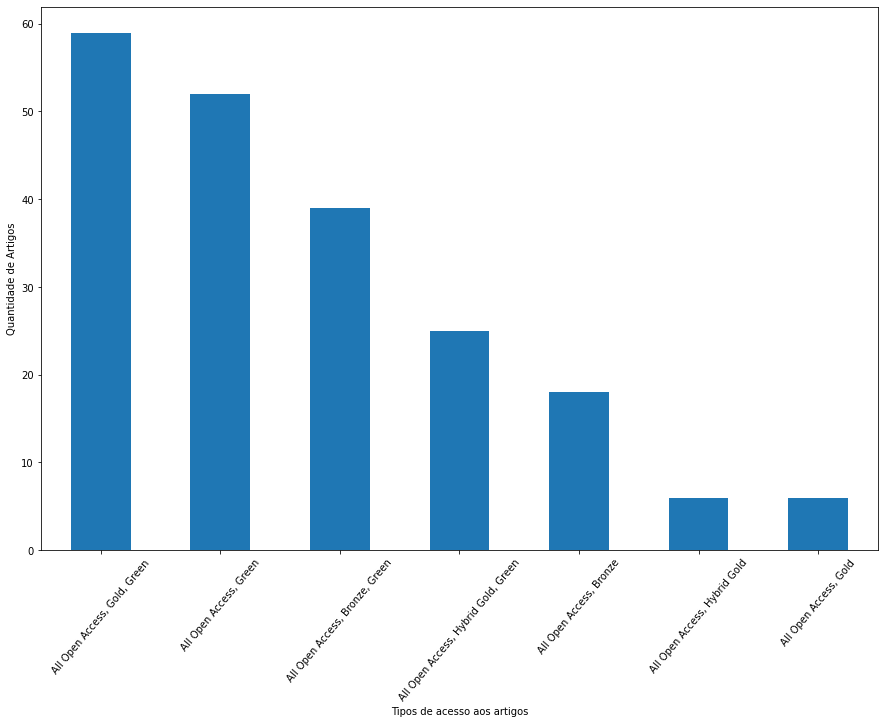

In [54]:
# pegar as 10 +
plt.figure(figsize=(15,10))
acesso_livre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de acesso aos artigos")
plt.ylabel("Quantidade de Artigos")
plt.show()

### Analisando tipos de documentos

In [55]:
# Groupby by
tipo_documento = df_scopus.groupby("tipo_documento")

# Summary statistic of all
tipo_documento.describe().head()

ano_publicacao_scopus                                 \
                                  count         mean       std     min   
tipo_documento                                                           
Article                           283.0  2015.367491  4.739969  1992.0   
Book                                1.0  2014.000000       NaN  2014.0   
Book Chapter                        7.0  2017.000000  2.708013  2013.0   
Conference Paper                  132.0  2015.242424  3.399868  2005.0   
Conference Review                   3.0  2015.333333  5.686241  2009.0   

                                                  quantidade_paginas         \
                      25%     50%     75%     max              count   mean   
tipo_documento                                                                
Article            2013.0  2017.0  2019.0  2021.0                0.0    NaN   
Book               2014.0  2014.0  2014.0  2014.0                0.0    NaN   
Book Chapter       2015.0  2018.0  2019.0  2020.0                0.0    NaN   
Conference Paper   2013.0  2015.5  2018.0  2021.0                1.0   11.0   
Conference Review  2013.0  2017.0  2018.5  2020.0                2.0  971.0   

                   ... fim_pagina_          quantidade_paginas_              \
                   ...         75%      max               count        mean   
tipo_documento     ...                                                        
Article            ...       766.0  10381.0               201.0   88.079602   
Book               ...       264.0    264.0                 1.0  263.000000   
Book Chapter       ...       626.5   1000.0                 7.0   13.142857   
Conference Paper   ...       592.0   6096.0               113.0    6.442478   
Conference Review  ...       132.0    132.0                 1.0  131.000000   

                                                                   
                          std    min    25%    50%    75%     max  
tipo_documento                                                     
Article            808.386420    1.0    6.0    8.0   10.0  9349.0  
Book                      NaN  263.0  263.0  263.0  263.0   263.0  
Book Chapter         7.712081    4.0    8.5   10.0   18.5    24.0  
Conference Paper     3.568058    1.0    4.0    5.0    9.0    26.0  
Conference Review         NaN  131.0  131.0  131.0  131.0   131.0  

[5 rows x 72 columns]

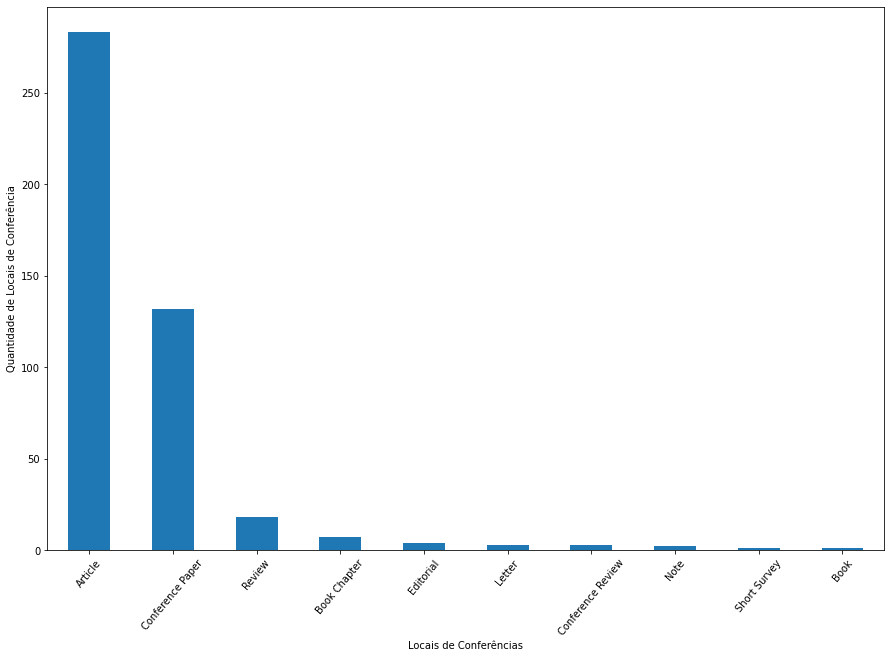

In [56]:
# pegar as 10 +
plt.figure(figsize=(15,10))
tipo_documento.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

### Analisando Locais de Conferencia

In [57]:
# Groupby by
local_conferencia = df_scopus.groupby("local_conferencia")

# Summary statistic of all
local_conferencia.describe().head()

ano_publicacao_scopus                                       \
                                  count    mean  std     min     25%     50%   
local_conferencia                                                              
Amsterdam                           1.0  2007.0  NaN  2007.0  2007.0  2007.0   
Arlington, VA                       1.0  2010.0  NaN  2010.0  2010.0  2010.0   
Boston, MA                          1.0  2012.0  NaN  2012.0  2012.0  2012.0   
Brisbane, QLD                       1.0  2007.0  NaN  2007.0  2007.0  2007.0   
Copenhagen                          4.0  2013.0  0.0  2013.0  2013.0  2013.0   

                                  quantidade_paginas       ... fim_pagina_  \
                      75%     max              count mean  ...         75%   
local_conferencia                                          ...               
Amsterdam          2007.0  2007.0                0.0  NaN  ...       246.0   
Arlington, VA      2010.0  2010.0                0.0  NaN  ...       496.0   
Boston, MA         2012.0  2012.0                0.0  NaN  ...        77.0   
Brisbane, QLD      2007.0  2007.0                0.0  NaN  ...       549.0   
Copenhagen         2013.0  2013.0                0.0  NaN  ...       628.5   

                         quantidade_paginas_                               \
                     max               count  mean  std   min   25%   50%   
local_conferencia                                                           
Amsterdam          246.0                 1.0   4.0  NaN   4.0   4.0   4.0   
Arlington, VA      496.0                 1.0   4.0  NaN   4.0   4.0   4.0   
Boston, MA          77.0                 1.0  14.0  NaN  14.0  14.0  14.0   
Brisbane, QLD      549.0                 1.0   4.0  NaN   4.0   4.0   4.0   
Copenhagen         686.0                 3.0   4.0  0.0   4.0   4.0   4.0   

                               
                    75%   max  
local_conferencia              
Amsterdam           4.0   4.0  
Arlington, VA       4.0   4.0  
Boston, MA         14.0  14.0  
Brisbane, QLD       4.0   4.0  
Copenhagen          4.0   4.0  

[5 rows x 72 columns]

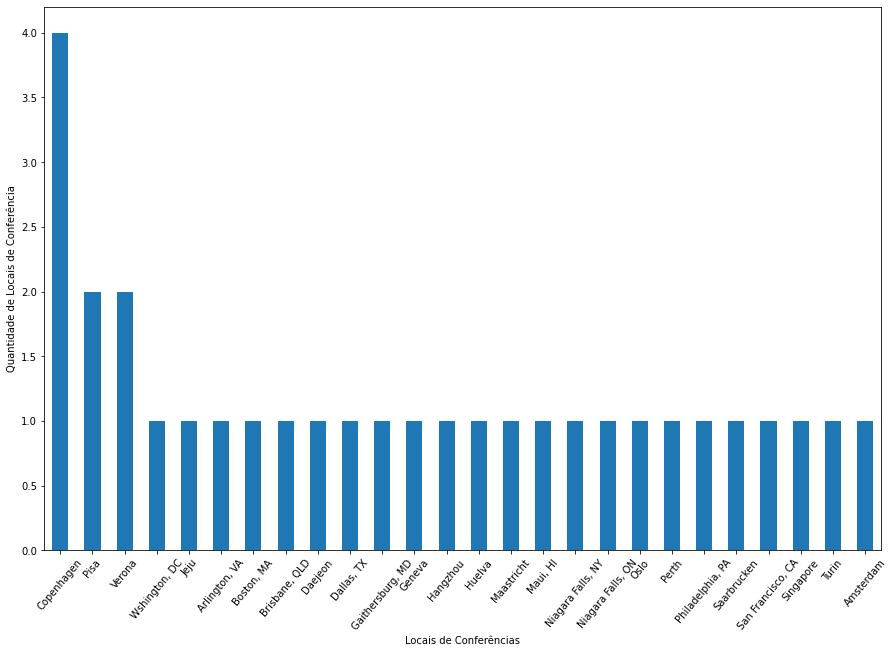

In [58]:
# pegar as 10 +
plt.figure(figsize=(15,10))
local_conferencia.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

### Analisando Editores

In [59]:
# Groupby by
editor = df_scopus.groupby("editor")

# Summary statistic of all
editor.describe().head()

ano_publicacao_scopus  \
                                                                   count   
editor                                                                     
Academic Press Inc.                                                 37.0   
Adis                                                                 3.0   
American Academy of Allergy, Asthma and Immunology                   2.0   
American College of Physicians                                       1.0   
American Society of Clinical Oncology                                2.0   

                                                                           \
                                                           mean       std   
editor                                                                      
Academic Press Inc.                                 2016.378378  3.094362   
Adis                                                2020.000000  1.000000   
American Academy of Allergy, Asthma and Immunology  2018.500000  2.121320   
American College of Physicians                      2017.000000       NaN   
American Society of Clinical Oncology               2020.000000  0.000000   

                                                                             \
                                                       min      25%     50%   
editor                                                                        
Academic Press Inc.                                 2003.0  2015.00  2016.0   
Adis                                                2019.0  2019.50  2020.0   
American Academy of Allergy, Asthma and Immunology  2017.0  2017.75  2018.5   
American College of Physicians                      2017.0  2017.00  2017.0   
American Society of Clinical Oncology               2020.0  2020.00  2020.0   

                                                                     \
                                                        75%     max   
editor                                                                
Academic Press Inc.                                 2019.00  2021.0   
Adis                                                2020.50  2021.0   
American Academy of Allergy, Asthma and Immunology  2019.25  2020.0   
American College of Physicians                      2017.00  2017.0   
American Society of Clinical Oncology               2020.00  2020.0   

                                                   quantidade_paginas       \
                                                                count mean   
editor                                                                       
Academic Press Inc.                                               0.0  NaN   
Adis                                                              0.0  NaN   
American Academy of Allergy, Asthma and Immunology                0.0  NaN   
American College of Physicians                                    0.0  NaN   
American Society of Clinical Oncology                             0.0  NaN   

                                                    ... fim_pagina_           \
                                                    ...         75%      max   
editor                                              ...                        
Academic Press Inc.                                 ...       287.0    362.0   
Adis                                                ...       647.5    785.0   
American Academy of Allergy, Asthma and Immunology  ...      9644.0  10381.0   
American College of Physicians                      ...       227.0    227.0   
American Society of Clinical Oncology               ...       445.0    463.0   

                                                   quantidade_paginas_  \
                                                                 count   
editor                                                                   
Academic Press Inc.                                               29.0   
Adis                                                         

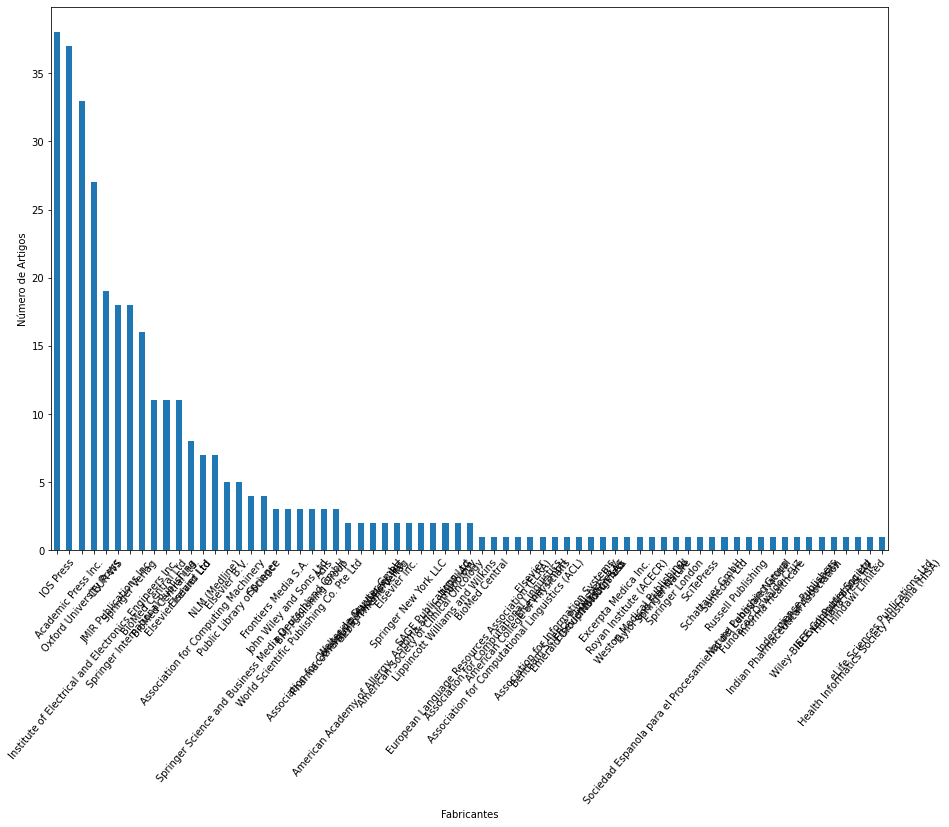

In [60]:
## Pegar os 10 +
plt.figure(figsize=(15,10))
editor.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Fabricantes")
plt.ylabel("Número de Artigos")
plt.show()

### Analisando artigos por Ano

In [61]:
# Groupby by
ano = df_scopus.groupby("ano_publicacao_scopus")

# Summary statistic of all
ano.describe().head()

quantidade_paginas                               \
                                   count mean std min 25% 50% 75% max   
ano_publicacao_scopus                                                   
1992                                 0.0  NaN NaN NaN NaN NaN NaN NaN   
2000                                 0.0  NaN NaN NaN NaN NaN NaN NaN   
2001                                 0.0  NaN NaN NaN NaN NaN NaN NaN   
2003                                 0.0  NaN NaN NaN NaN NaN NaN NaN   
2004                                 0.0  NaN NaN NaN NaN NaN NaN NaN   

                      quantidade_citacoes               ... fim_pagina_  \
                                    count         mean  ...         75%   
ano_publicacao_scopus                                   ...               
1992                                  1.0    30.000000  ...       896.0   
2000                                  1.0    20.000000  ...       153.0   
2001                                  1.0  1194.000000  ...        21.0   
2003                                  3.0   134.333333  ...       437.0   
2004                                  4.0    13.500000  ...       578.0   

                             quantidade_paginas_                              \
                         max               count  mean       std   min   25%   
ano_publicacao_scopus                                                          
1992                   896.0                 1.0   6.0       NaN   6.0   6.0   
2000                   153.0                 1.0  14.0       NaN  14.0  14.0   
2001                    21.0                 1.0   4.0       NaN   4.0   4.0   
2003                   533.0                 3.0   8.0  4.582576   4.0   5.5   
2004                   767.0                 4.0   4.0  0.000000   4.0   4.0   

                                         
                        50%   75%   max  
ano_publicacao_scopus                    
1992                    6.0   6.0   6.0  
2000                   14.0  14.0  14.0  
2001                    4.0   4.0   4.0  
2003                    7.0  10.0  13.0  
2004                    4.0   4.0   4.0  

[5 rows x 64 columns]

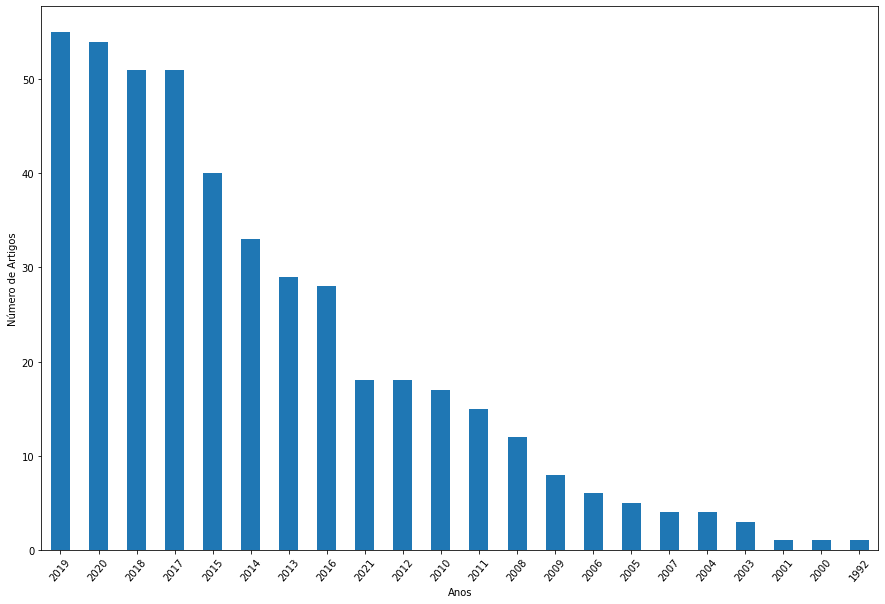

In [62]:
plt.figure(figsize=(15,10))
ano.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Anos")
plt.ylabel("Número de Artigos")
plt.show()

### Analisando os idiomas

In [63]:
# Groupby by
idioma = df_scopus.groupby("idioma_original")

# Summary statistic of all
idioma.describe().head()

ano_publicacao_scopus                                         \
                                count         mean       std     min     25%   
idioma_original                                                                
English                         452.0  2015.424779  4.321463  1992.0  2013.0   
French                            1.0  2011.000000       NaN  2011.0  2011.0   
Spanish                           1.0  2018.000000       NaN  2018.0  2018.0   

                                        quantidade_paginas         ...  \
                    50%     75%     max              count   mean  ...   
idioma_original                                                    ...   
English          2017.0  2019.0  2021.0                3.0  651.0  ...   
French           2011.0  2011.0  2011.0                0.0    NaN  ...   
Spanish          2018.0  2018.0  2018.0                0.0    NaN  ...   

                fim_pagina_          quantidade_paginas_             \
                        75%      max               count       mean   
idioma_original                                                       
English               684.5  10381.0               344.0  55.444767   
French                161.0    161.0                 1.0   3.000000   
Spanish                36.0     36.0                 1.0   5.000000   

                                                          
                        std  min  25%  50%   75%     max  
idioma_original                                           
English          618.697063  1.0  4.0  7.0  9.25  9349.0  
French                  NaN  3.0  3.0  3.0  3.00     3.0  
Spanish                 NaN  5.0  5.0  5.0  5.00     5.0  

[3 rows x 72 columns]

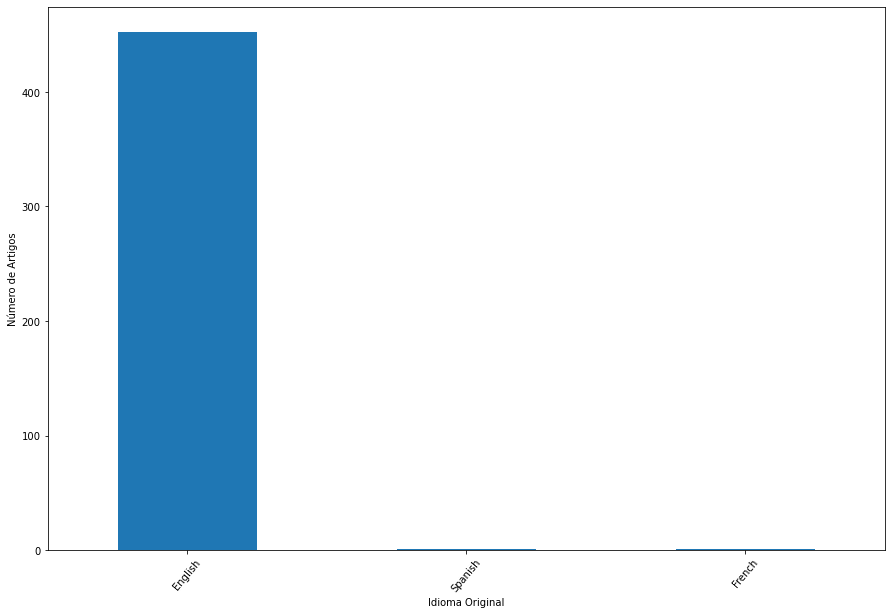

In [64]:
plt.figure(figsize=(15,10))
idioma.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Idioma Original")
plt.ylabel("Número de Artigos")
plt.show()

Visão geral em gráfico


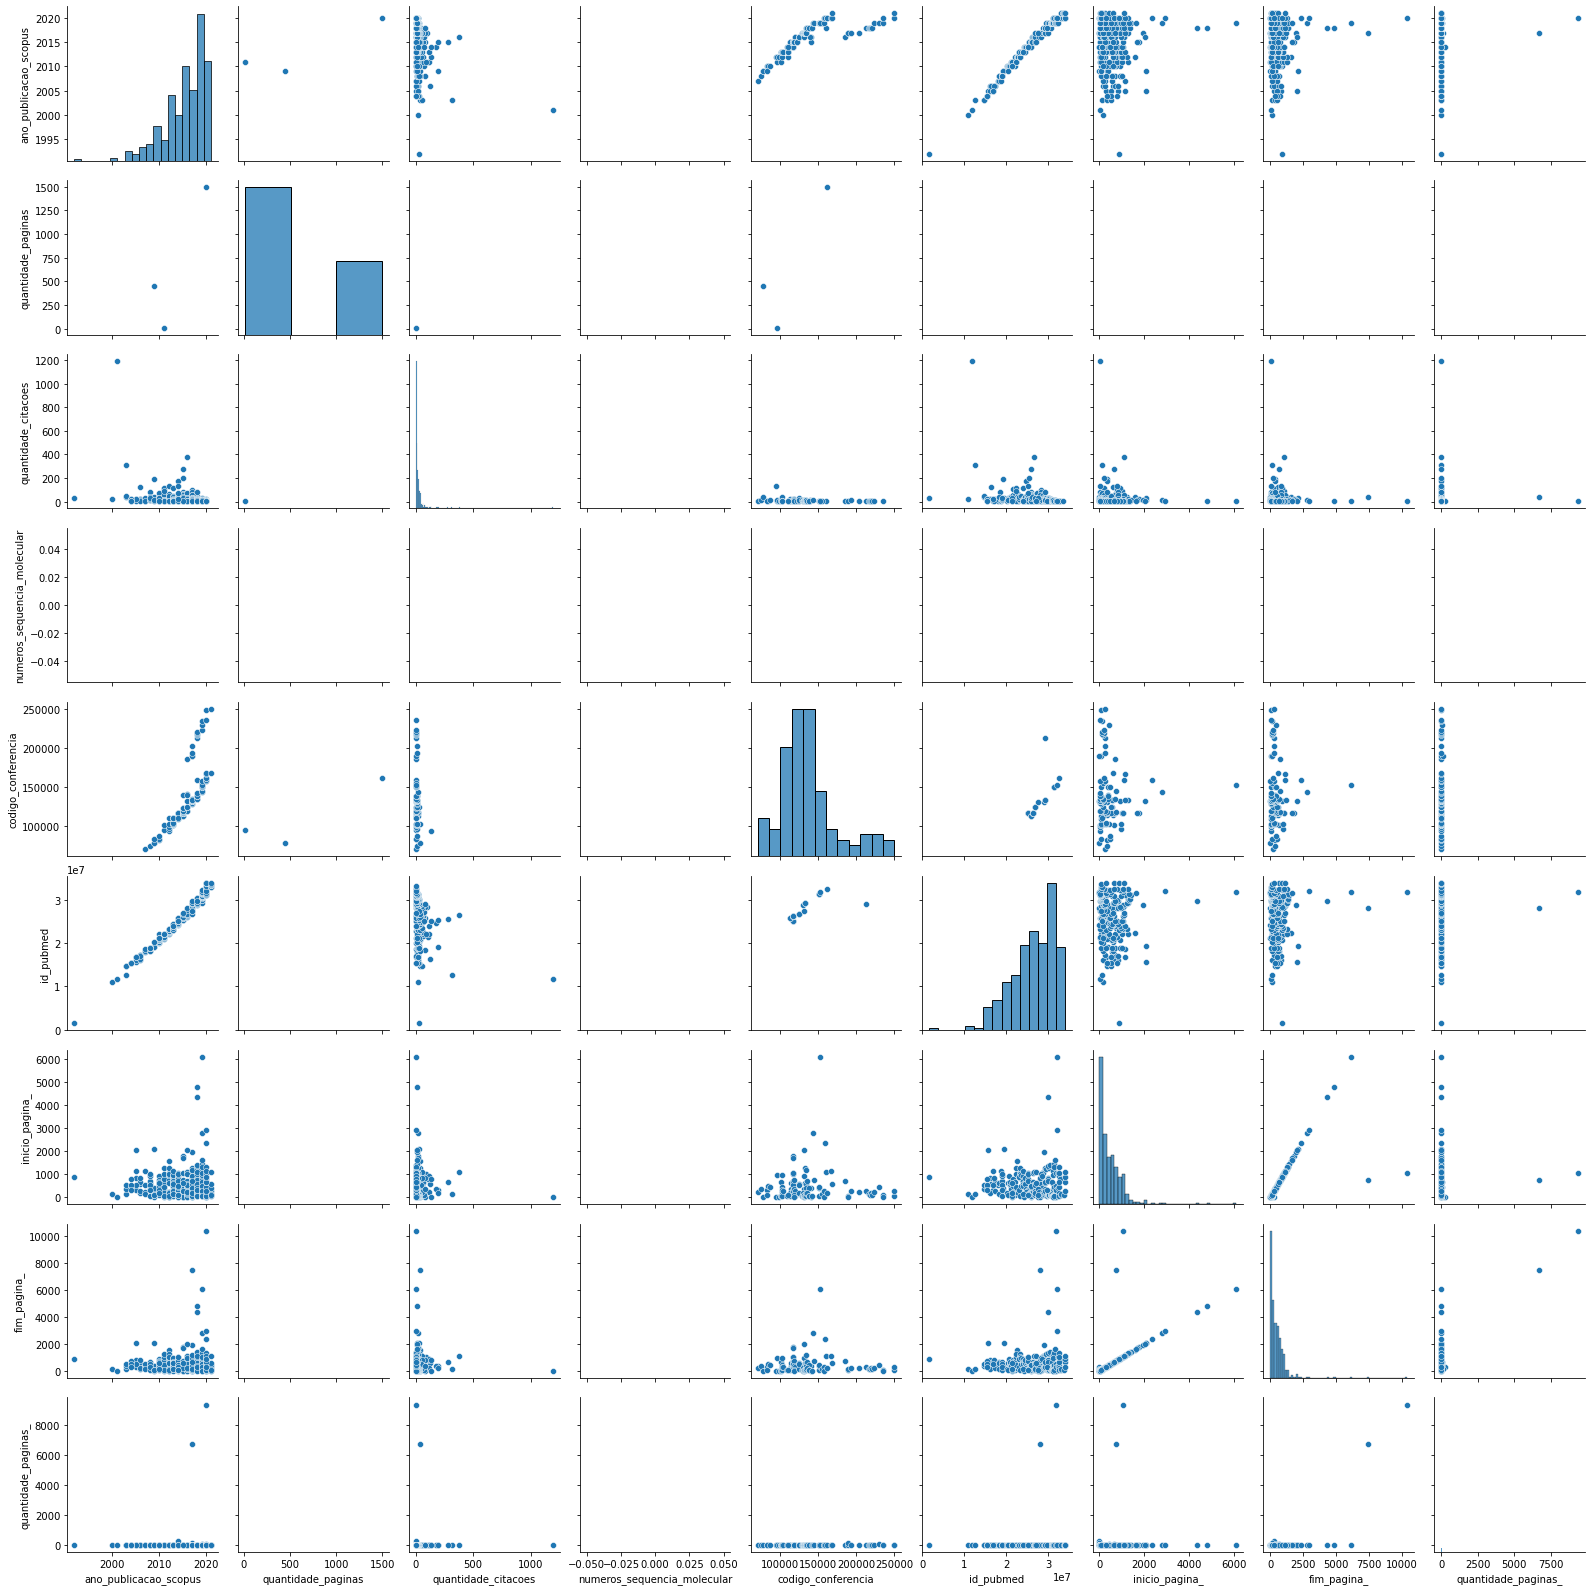

In [65]:
#
print('Visão geral em gráfico')
sns.pairplot(df_scopus)

In [66]:
## qtde de artigos financiados e nao financiados - criar coluna

In [67]:
## qtde de artigos patrociandores e nao patrociandores - criar coluna

In [68]:
## criar regex para identificar emails da coluna editores

## Nuvem de Palavras

 ### Nuvem de Palavras dos Títulos

In [69]:
import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

print(stopwords)

# apend outras palavras

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
#df_scopus['issn_scopus'] = df_scopus.issn_scopus.str.upper()
palavras_titulo = df_scopus['titulo_artigo'].str.lower()
palavras_titulo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


457                                                       development of a questionnaire for detecting potential adverse drug reactions
456    the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem)
455                                                  effective mapping of biomedical text to the umls metathesaurus the metamap program
452                                                                               detecting adverse events using information technology
454                                                 towards linking patients and clinical information detecting umls concepts in e mail
                                                                     ...                                                               
65                                                                 selection of clinical text features for classifying suicide attempts
69                              bleeding entity 

In [71]:
print(f'O objeto palavras é do tipo {type(palavras_titulo)} e tem o shape de {palavras_titulo.shape}')

O objeto palavras é do tipo <class 'pandas.core.series.Series'> e tem o shape de (454,)


In [72]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_titulo = " ".join(s for s in palavras_titulo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [73]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo)} e seu tipo atual é{type(wordcloud_palavras_titulo)}')

Quantidade de palavras no corpus: 43252 e seu tipo atual é<class 'str'>


In [74]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo)

Criação da nuvem de palavras sem tratamento nos textos


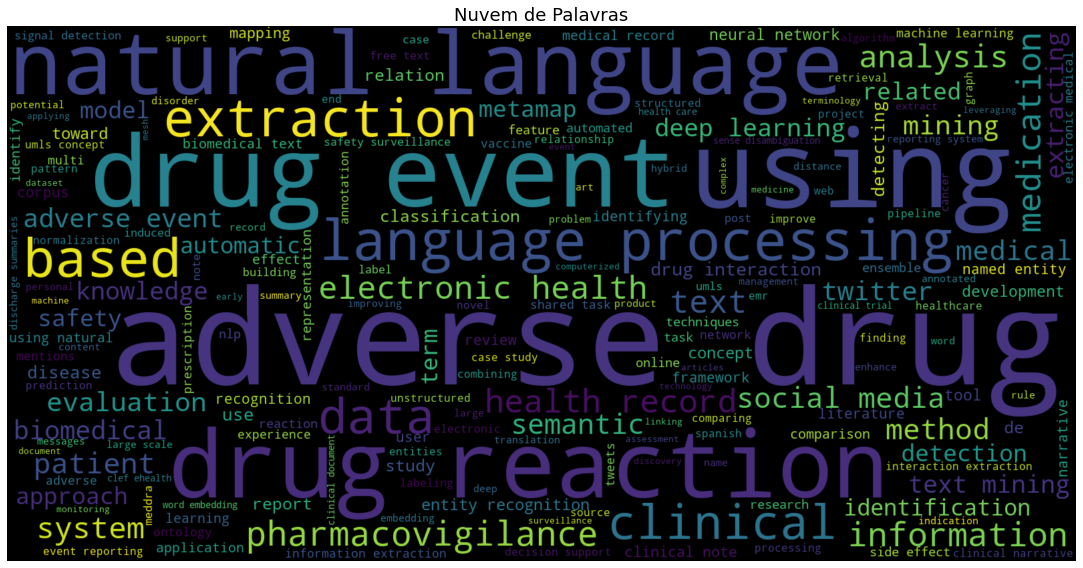

In [75]:
#Gráfico Nuvem de Palavras
# Gerando o grafico 
# Variáveis do gráfico 
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

### Nuvem de Palavras dos Resumos

In [76]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_resumo = df_scopus['resumo'].str.lower()
palavras_resumo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


457    objective: to develop a comprehensive list of symptoms categorized by body system as part of a questionnaire for detecting potential adverse drug reactions. data sources: a preliminary list of sym...
456    the medical dictionary for regulatory activities terminology (meddra) version 2.1 (v2.1) was released in march 1999 accompanied by the meddra/j v2.1j specifically for japanese users. in prescripti...
455    the umls metathesaurus, the largest thesaurus in the biomedical domain, provides a representation of biomedical knowledge consisting of concepts classified by semantic type and both hierarchical a...
452    context: although patient safety is a major problem, most health care organizations rely on spontaneous reporting, which detects only a small minority of adverse events. as a result, problems with...
454    the purpose of this project is to explore the feasibility of detecting terms within the electronic messages of patients that could be used to effectively search elec

In [77]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_resumo = " ".join(s for s in palavras_resumo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [78]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_resumo)} e seu tipo atual é{type(wordcloud_palavras_resumo)}')

Quantidade de palavras no corpus: 654378 e seu tipo atual é<class 'str'>


In [79]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_resumo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_resumo)

Criação da nuvem de palavras sem tratamento nos textos


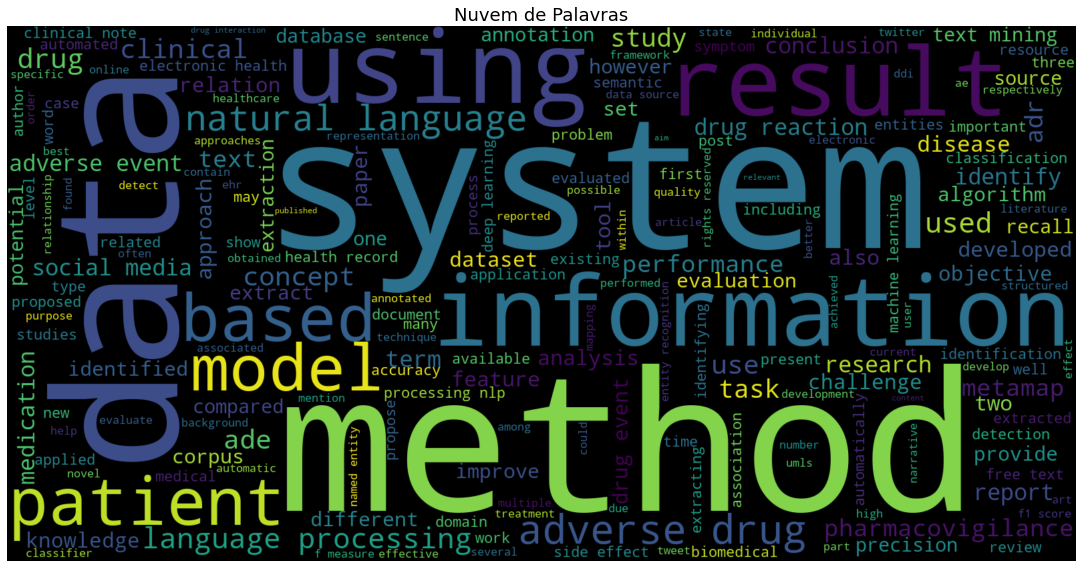

In [80]:
#Gráfico Nuvem de Palavras
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_resumo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

### Nuvem de Palavras do Conteúdo dos textos

# Dataframe Qualis

## Ajustar de Colunas

### Alterar nome de colunas

In [81]:
print('Verificar colunas')
df_qualis.columns

Verificar colunas


Index(['ISSN', 'Título', 'Área de Avaliação', 'Estrato'], dtype='object')

In [82]:
columns_qualis = {
    'ISSN': 'issn_qualis',
    'Título':'titulo_periodico',
    'Área de Avaliação':'area_avaliacao', 
    'Estrato':'estrato',
}

In [83]:
df_qualis = df_qualis.rename(columns=columns_qualis)
df_qualis.head(1)

,issn_qualis,titulo_periodico,area_avaliacao,estrato
0,1981-030X,19&20 (RIO DE JANEIRO),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS CONTÁBEIS E TURISMO",C


## Ajustar tipagem de dados

### Converter colunas para categórica

In [84]:
print('Ajustar tipagem dos dados')
df_qualis['estrato'] = df_qualis['estrato'].astype('category')

Ajustar tipagem dos dados


### Filtrar base Qualis

In [85]:
print(df_qualis['area_avaliacao'].unique())

['ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS CONTÁBEIS E TURISMO'
 'ANTROPOLOGIA / ARQUEOLOGIA                        '
 'ARQUITETURA, URBANISMO E DESIGN' 'ARTES'
 'ASTRONOMIA / FÍSICA                               ' 'BIODIVERSIDADE'
 'BIOTECNOLOGIA                                     '
 'CIÊNCIA DA COMPUTAÇÃO                             '
 'CIÊNCIA DE ALIMENTOS                              '
 'CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS        '
 'CIÊNCIAS AGRÁRIAS I                               '
 'CIÊNCIAS AMBIENTAIS'
 'CIÊNCIAS BIOLÓGICAS I                             '
 'CIÊNCIAS BIOLÓGICAS II                            '
 'CIÊNCIAS BIOLÓGICAS III                           '
 'CIÊNCIAS DA RELIGIÃO E TEOLOGIA' 'COMUNICAÇÃO E INFORMAÇÃO'
 'DIREITO                                           '
 'ECONOMIA                                          '
 'EDUCAÇÃO                                          '
 'EDUCAÇÃO FÍSICA                                   '
 'ENFERMAGEM                  

### Remover as areas abaixo

In [86]:

#%%timeit
df_remove = df_qualis.loc[
    (df_qualis['area_avaliacao'] == 'ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS CONTÁBEIS E TURISMO') |
    (df_qualis['area_avaliacao'] == 'ARTES') |
    (df_qualis['area_avaliacao'] == 'ANTROPOLOGIA / ARQUEOLOGIA                        ') |
    (df_qualis['area_avaliacao'] == 'ARQUITETURA, URBANISMO E DESIGN') |
    (df_qualis['area_avaliacao'] == 'ASTRONOMIA / FÍSICA                               ') |
    (df_qualis['area_avaliacao'] == 'BIODIVERSIDADE') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS AGRÁRIAS I                               ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIA DE ALIMENTOS                              ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS        ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS AGRÁRIAS I                               ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS AMBIENTAIS') |   
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS DA RELIGIÃO E TEOLOGIA') |
    (df_qualis['area_avaliacao'] == 'COMUNICAÇÃO E INFORMAÇÃO') |
    (df_qualis['area_avaliacao'] == 'DIREITO                                           ') |
    (df_qualis['area_avaliacao'] == 'ECONOMIA                                          ') |
    (df_qualis['area_avaliacao'] == 'EDUCAÇÃO                                          ') |
    (df_qualis['area_avaliacao'] == 'ENSINO') |
    (df_qualis['area_avaliacao'] == 'EDUCAÇÃO FÍSICA                                   ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS I                                     ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS II                                    ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS III                                   ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS IV                                    ' ) |
    (df_qualis['area_avaliacao'] == 'GEOCIÊNCIAS                                       ' ) |
    (df_qualis['area_avaliacao'] == 'FILOSOFIA') |
    (df_qualis['area_avaliacao'] == 'GEOGRAFIA                                         ') |
    (df_qualis['area_avaliacao'] == 'HISTÓRIA                                          ') |
    (df_qualis['area_avaliacao'] == 'INTERDISCIPLINAR                                  ') |
    (df_qualis['area_avaliacao'] == 'LINGUíSTICA E LITERATURA') |
    (df_qualis['area_avaliacao'] == 'MATERIAIS                                         ') |
    (df_qualis['area_avaliacao'] ==  'MEDICINA VETERINÁRIA                              ') |
    (df_qualis['area_avaliacao'] ==  'NUTRIÇÃO') |
    (df_qualis['area_avaliacao'] == 'PLANEJAMENTO URBANO E REGIONAL / DEMOGRAFIA       ') |
    (df_qualis['area_avaliacao'] == 'SERVIÇO SOCIAL                                    ') |
    (df_qualis['area_avaliacao'] == 'SOCIOLOGIA                                        ') |
    (df_qualis['area_avaliacao'] ==  'ZOOTECNIA / RECURSOS PESQUEIROS                   ') 
 
]

df_qualis_filtrado = df_qualis.drop(df_remove.index)
df_qualis_filtrado

,issn_qualis,titulo_periodico,area_avaliacao,estrato
12853,2328-0662,# ISOJ JOURNAL,BIOTECNOLOGIA,C
12854,2190-5738,3 BIOTECH,BIOTECNOLOGIA,B3
12855,0101-9163,A HORA VETERINÁRIA,BIOTECNOLOGIA,C
12856,1232-1966,AAEM. ANNALS OF AGRICULTURAL AND ENVIRONMENTAL MEDICINE,BIOTECNOLOGIA,B3
12857,1530-9932,AAPS PHARMSCITECH,BIOTECNOLOGIA,B1
...,...,...,...,...
126668,1696-3202,"ÁTOPOS - SALUD MENTAL, COMUNIDAD Y CULTURA",SAÚDE COLETIVA,B5
126669,2316-4360,ÉLISÉE - REVISTA DE GEOGRAFIA DA UEG,SAÚDE COLETIVA,B5
126670,1929-7017,ÉTHIQUE PUBLIQUE - REVUE INTERNATIONALE D'ÉTHIQUE SOCIÉTALE ET GOUVERNEMENTALE,SAÚDE COLETIVA,C
126671,1415-899X,ÚLTIMO ANDAR (PUCSP. IMPRESSO),SAÚDE COLETIVA,B5


## Analisar dataframe tratado

In [87]:
print('Verificando tipos e se tem dados nulos')
df_qualis_filtrado.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47063 entries, 12853 to 126672
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   issn_qualis       47063 non-null  object  
 1   titulo_periodico  47063 non-null  object  
 2   area_avaliacao    47063 non-null  object  
 3   estrato           47063 non-null  category
dtypes: category(1), object(3)
memory usage: 1.5+ MB


In [88]:
print('Resumo Estatístico de Campos Numéricos')
df_qualis_filtrado.describe()

Resumo Estatístico de Campos Numéricos


,issn_qualis,titulo_periodico,area_avaliacao,estrato
count,47063,47063,47063,47063
unique,14975,15603,15,8
top,1932-6203,PLOS ONE,MEDICINA I,B1
freq,60,57,5181,9020


In [89]:
# ver qtd no excel =NÚM.CARACT(O2)
print('Coluna com maior qtde de caracteres')
df_qualis_filtrado['titulo_periodico'].apply(str).map(len).max()

Coluna com maior qtde de caracteres


254

## Visualizações Qualis

### Anáilise Area de Avaliação

In [90]:
df_qualis_filtrado.columns


Index(['issn_qualis', 'titulo_periodico', 'area_avaliacao', 'estrato'], dtype='object')

In [91]:
# Groupby by
area_avaliacao_all = df_qualis_filtrado.groupby("area_avaliacao")

# Summary statistic of all
area_avaliacao_all.describe().head()

issn_qualis         \
                                                         count unique   
area_avaliacao                                                          
BIOTECNOLOGIA                                             4376   4137   
CIÊNCIA DA COMPUTAÇÃO                                     1850   1775   
CIÊNCIAS BIOLÓGICAS I                                     3870   3677   
CIÊNCIAS BIOLÓGICAS II                                    3889   3681   
CIÊNCIAS BIOLÓGICAS III                                   2403   2276   

                                                                    \
                                                          top freq   
area_avaliacao                                                       
BIOTECNOLOGIA                                       0100-4042    5   
CIÊNCIA DA COMPUTAÇÃO                               2237-2903    3   
CIÊNCIAS BIOLÓGICAS I                               1932-6203    4   
CIÊNCIAS BIOLÓGICAS II                              1932-6203    5   
CIÊNCIAS BIOLÓGICAS III                             1932-6203    8   

                                                   titulo_periodico         \
                                                              count unique   
area_avaliacao                                                               
BIOTECNOLOGIA                                                  4376   4211   
CIÊNCIA DA COMPUTAÇÃO                                          1850   1794   
CIÊNCIAS BIOLÓGICAS I                                          3870   3750   
CIÊNCIAS BIOLÓGICAS II                                         3889   3760   
CIÊNCIAS BIOLÓGICAS III                                        2403   2330   

                                                                                                          \
                                                                                                     top   
area_avaliacao                                                                                             
BIOTECNOLOGIA                                       BRAZILIAN JOURNAL OF MEDICAL AND BIOLOGICAL RESEARCH   
CIÊNCIA DA COMPUTAÇÃO                                                                           PLOS ONE   
CIÊNCIAS BIOLÓGICAS I                                                                           PLOS ONE   
CIÊNCIAS BIOLÓGICAS II                                                       JOURNAL OF NATURAL PRODUCTS   
CIÊNCIAS BIOLÓGICAS III                                                                         PLOS ONE   

                                                        estrato             \
                                                   freq   count unique top   
area_avaliacao                                                               
BIOTECNOLOGIA                                         4    4376      8  B1   
CIÊNCIA DA COMPUTAÇÃO                                 3    1850      8  C    
CIÊNCIAS BIOLÓGICAS I                                 4    3870      8  C    
CIÊNCIAS BIOLÓGICAS II                                4    3889      8  B1   
CIÊNCIAS BIOLÓGICAS III                               7    2403      8  C    

                                                         
                                                   freq  
area_avaliacao                                           
BIOTECNOLOGIA                                       800  
CIÊNCIA DA COMPUTAÇÃO                               378  
CIÊNCIAS BIOLÓGICAS I                               775  
CIÊNCIAS BIOLÓGICAS II                              766  
CIÊNCIAS BIOLÓGICAS III                             490

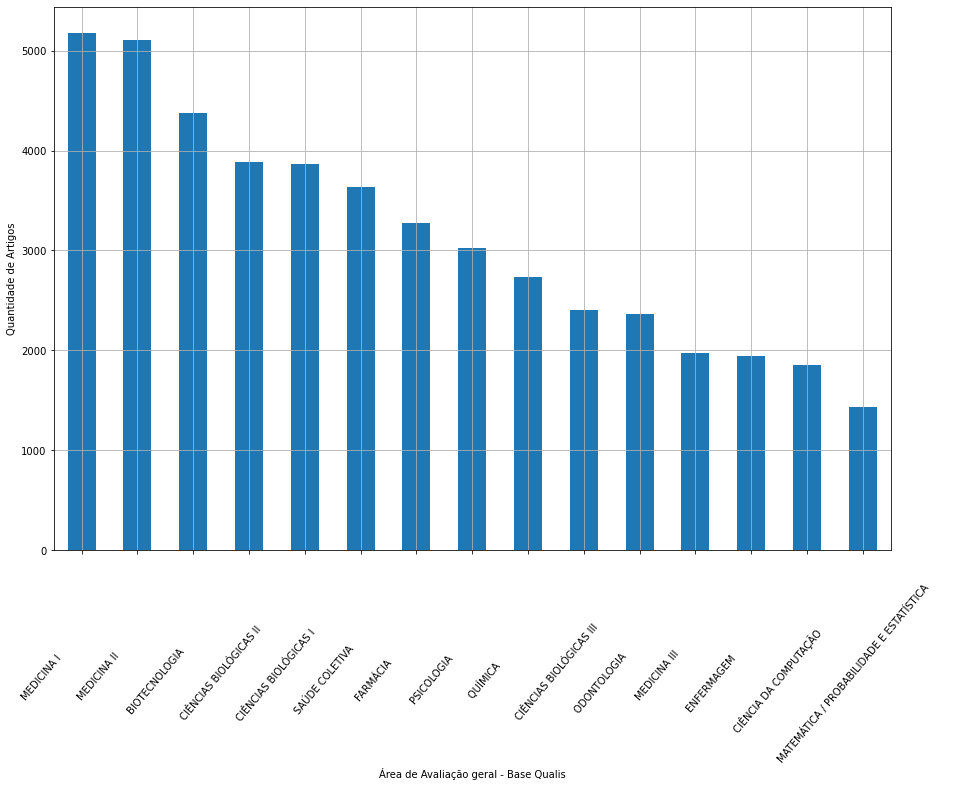

In [92]:
# pegar as 10 +
plt.figure(figsize=(15,10))
area_avaliacao_all.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Área de Avaliação geral - Base Qualis")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

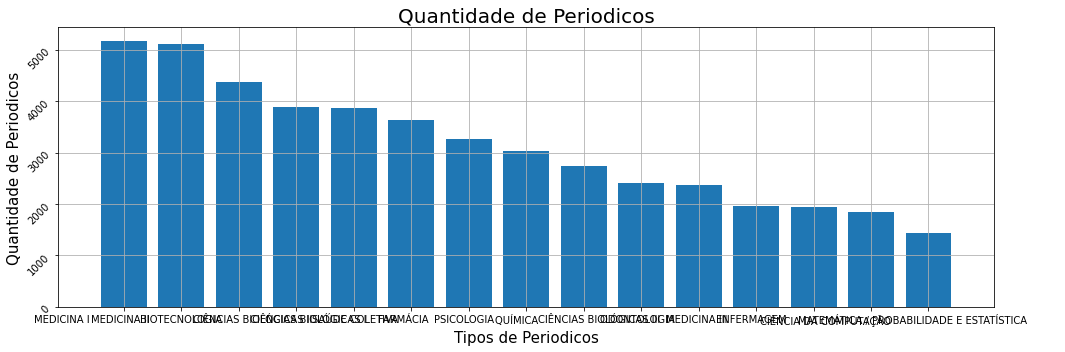

In [93]:
### Gerando gráfico Tipo de Extensões - pegar os 10 +

#variáveis do gráfico
titulo = 'Quantidade de Periodicos'
eixo_x = 'Tipos de Periodicos'
eixo_y = 'Quantidade de Periodicos'
data_hora = datetime.datetime.now()
path = os.path.join('..','image')
img_extensao = '.png'
image = ''

# Matplotlib
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(df_qualis_filtrado['area_avaliacao'].value_counts().index, df_qualis_filtrado['area_avaliacao'].value_counts())

#Legendas e eixos
#ax.legend(title='Legenda', loc=4, fontsize=20)
ax.set_title(titulo, fontsize=20)
ax.set_xlabel(eixo_x, fontsize=15)
ax.set_ylabel(eixo_y, fontsize=15)
plt.yticks(rotation=45) ## agrupar datas por meses, trimestre ou ano, etc

plt.grid()

#Salvar imagem
#plt.savefig(path+image, dpi=300)
plt.tight_layout()
plt.show()

plt.show()

# Dataframe PubMEd

## Ajustar de Colunas

### Alterar nome de Colunas

In [94]:
print('Verificar colunas')
df_pubmed.columns

Verificar colunas


Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI'],
      dtype='object')

In [95]:
columns_scopus = {
    'PMID':'id_pubmed',
    'Title':'titulo_artigo',
    'Authors':'autores_pubmed',
    'Citation':'citacao_pubmed',
    'First Author':'primeiro_autor_pubmed',
    'Journal/Book':'jornal_book_pubmed',
    'Publication Year':'ano_publicacao_pubmed',
    'Create Date':'data_criacao_pubmed', 
    'PMCID':'id_pmc_pubmed', 
    'NIHMS ID':'id_nihms_pubmed', 
    'DOI':'doi_pubmed',
}

In [96]:
df_pubmed = df_pubmed.rename(columns=columns_scopus)

### Inclusão novas colunas

In [97]:
## criar uma coluna fonte com valor = pubmed
df_pubmed['fonte']='PubMed' # variavel para receber a base indexada do documento

In [98]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata junto com título
df_pubmed["doi"] = df_pubmed["doi_pubmed"]

In [99]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata 
df_pubmed["titulo_artigo_pubmed"] = df_pubmed["titulo_artigo"]

## Colunas para lower

In [100]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].str.lower()
df_pubmed["doi"] = df_pubmed["doi"].str.lower()

## Remover caracteres especiais

In [101]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [102]:
df_pubmed.loc[:,'titulo_artigo'] = df_pubmed['titulo_artigo'].apply(limpar_campo)

In [103]:
df_pubmed['titulo_artigo'] = df_pubmed['titulo_artigo'].str.replace('  ', ' ')

## Colunas Strip

In [104]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].str.strip()

## Ajustar tipagem de dados

In [105]:
df_pubmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_pubmed              252 non-null    int64 
 1   titulo_artigo          252 non-null    object
 2   autores_pubmed         252 non-null    object
 3   citacao_pubmed         252 non-null    object
 4   primeiro_autor_pubmed  252 non-null    object
 5   jornal_book_pubmed     252 non-null    object
 6   ano_publicacao_pubmed  252 non-null    int64 
 7   data_criacao_pubmed    252 non-null    object
 8   id_pmc_pubmed          157 non-null    object
 9   id_nihms_pubmed        26 non-null     object
 10  doi_pubmed             181 non-null    object
 11  fonte                  252 non-null    object
 12  doi                    181 non-null    object
 13  titulo_artigo_pubmed   252 non-null    object
dtypes: int64(2), object(12)
memory usage: 27.7+ KB


### Convertendo as colunas de datas para o formato datetime

In [106]:
#Convertendo as colunas de datas para o formato datetime
colunas_datas = df_pubmed.columns[df_pubmed.columns.str.contains('DT_|dt\|data|DATA|Data', regex=True)]

In [107]:
#convertendo cada coluna de colunas_datas para o formato datetime
for coluna in colunas_datas:
    df_pubmed[coluna] = pd.to_datetime(df_pubmed[coluna], format='%Y-%m-%d')

In [108]:
## nao funfou, verificar
df_pubmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_pubmed              252 non-null    int64 
 1   titulo_artigo          252 non-null    object
 2   autores_pubmed         252 non-null    object
 3   citacao_pubmed         252 non-null    object
 4   primeiro_autor_pubmed  252 non-null    object
 5   jornal_book_pubmed     252 non-null    object
 6   ano_publicacao_pubmed  252 non-null    int64 
 7   data_criacao_pubmed    252 non-null    object
 8   id_pmc_pubmed          157 non-null    object
 9   id_nihms_pubmed        26 non-null     object
 10  doi_pubmed             181 non-null    object
 11  fonte                  252 non-null    object
 12  doi                    181 non-null    object
 13  titulo_artigo_pubmed   252 non-null    object
dtypes: int64(2), object(12)
memory usage: 27.7+ KB


### Convertendo as colunas para categóricas

In [109]:
print('Ajustar tipagem dos dados')
df_pubmed['jornal_book_pubmed'] = df_pubmed['jornal_book_pubmed'].astype('category')

Ajustar tipagem dos dados


In [110]:
## nao funfou, verificar
df_pubmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id_pubmed              252 non-null    int64   
 1   titulo_artigo          252 non-null    object  
 2   autores_pubmed         252 non-null    object  
 3   citacao_pubmed         252 non-null    object  
 4   primeiro_autor_pubmed  252 non-null    object  
 5   jornal_book_pubmed     252 non-null    category
 6   ano_publicacao_pubmed  252 non-null    int64   
 7   data_criacao_pubmed    252 non-null    object  
 8   id_pmc_pubmed          157 non-null    object  
 9   id_nihms_pubmed        26 non-null     object  
 10  doi_pubmed             181 non-null    object  
 11  fonte                  252 non-null    object  
 12  doi                    181 non-null    object  
 13  titulo_artigo_pubmed   252 non-null    object  
dtypes: category(1), int64(2), object(11)
memor

## Verificar duplicados

In [111]:
# Ordenando para excluir primeiro as duplicidades
df_pubmed = df_pubmed.sort_values(['doi_pubmed','titulo_artigo'])
df_pubmed[['doi_pubmed','titulo_artigo']]

,doi_pubmed,titulo_artigo
243,10.1002/pds.1151,an algorithm to derive a numerical daily dose from unstructured text dosage instructions
118,10.1002/pds.3351,consistency in the safety labeling of bioequivalent medications
29,10.1002/pds.4857,comparison of text processing methods in social media based signal detection
17,10.1002/phar.2151,natural language processing and its implications for the future of medication safety a narrative review of recent advances and challenges
146,10.1002/prp2.421,screening of anticancer drugs to detect drug induced interstitial pneumonia using the accumulated data in the electronic medical record
...,...,...
100,NaN,structuring clinical decision support rules for drug safety using natural language processing
174,NaN,the effect object paradigm a means to support medication safety with clinical decision support
62,NaN,uarizona at the made1 0 nlp challenge
133,NaN,using linked data for mining drug drug interactions in electronic health records


In [112]:
df_pubmed = df_pubmed.drop_duplicates(['titulo_artigo','doi_pubmed'], keep='last') ## de 252 para [251 rows x 12 columns]
print(df_pubmed)

     id_pubmed  \
243   16170830   
118   23042584   
29    31392844   
17    29884988   
146   30009034   
..         ...   
100   29968609   
174   25160352   
62    30467557   
133   23920643   
84    28269895   

                                                                                                                                 titulo_artigo  \
243                                                   an algorithm to derive a numerical daily dose from unstructured text dosage instructions   
118                                                                            consistency in the safety labeling of bioequivalent medications   
29                                                                comparison of text processing methods in social media based signal detection   
17   natural language processing and its implications for the future of medication safety a narrative review of recent advances and challenges   
146    screening of anticancer drugs to detect drug i

## Analisar dados tratados

In [113]:
print('Verificando tipos e se tem dados nulos')
df_pubmed.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 243 to 84
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id_pubmed              251 non-null    int64   
 1   titulo_artigo          251 non-null    object  
 2   autores_pubmed         251 non-null    object  
 3   citacao_pubmed         251 non-null    object  
 4   primeiro_autor_pubmed  251 non-null    object  
 5   jornal_book_pubmed     251 non-null    category
 6   ano_publicacao_pubmed  251 non-null    int64   
 7   data_criacao_pubmed    251 non-null    object  
 8   id_pmc_pubmed          156 non-null    object  
 9   id_nihms_pubmed        26 non-null     object  
 10  doi_pubmed             181 non-null    object  
 11  fonte                  251 non-null    object  
 12  doi                    181 non-null    object  
 13  titulo_artigo_pubmed   251 non-null    object  
dtypes:

In [114]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_pubmed.describe()

Resumo Estatístico de Campos Numéricos


,id_pubmed,ano_publicacao_pubmed
count,2.510000e+02,251.000000
mean,2.645476e+07,2014.900398
std,5.351175e+06,4.825147
min,1.504394e+06,1992.000000
25%,2.326403e+07,2012.000000
50%,2.768367e+07,2016.000000
75%,3.062511e+07,2019.000000
max,3.411156e+07,2021.000000


In [115]:
df_scopus.nunique()

autores_scopus                 443
id_autores                     441
titulo_artigo                  454
ano_publicacao_scopus           22
titulo_fonte                   153
volume                         172
publicado                       36
numero_artigo                  105
inicio_pagina                  284
fim_pagina                     295
quantidade_paginas               3
quantidade_citacoes             71
doi_scopus                     376
link_scopus                    454
afiliacoes                     444
autores_com_filiacoes          451
resumo                         445
palavras_chaves_autor          316
palavras_chave_index           413
numeros_sequencia_molecular      0
quimica                         73
nomes_comerciais                17
fabricantes                      1
detalhes_financiamento         209
texto_financiamento_1          183
texto_financiamento_2           21
texto_financiamento_3            1
referencias                    401
endereco_corresponde

# Dataframe CAPES

# Concatenar dataframes de bases indexadas

In [116]:
#https://www.acervolima.com.br/2020/08/concat-e-append-do-pandas-como-usar.html
qtde_scopus = df_scopus.titulo_artigo.count()
qtde_pubmed = df_pubmed.titulo_artigo.count()

# 3 colunas em comum: titulo_artigo, id_pubmed, fonte
shape_scopus = df_scopus.shape
shape_pubmed = df_pubmed.shape

print(f'A quantidade de artigos na base scopus é: {qtde_scopus} e a quantidade de colunas é {shape_scopus}')
print(f'A quantidade de artigos na base pubmed é: {qtde_pubmed} e a quantidade de colunas é {shape_pubmed}')
print(f'O total de artigos concatedos tem que ser {qtde_pubmed+qtde_scopus}')

A quantidade de artigos na base scopus é: 454 e a quantidade de colunas é (454, 52)
A quantidade de artigos na base pubmed é: 251 e a quantidade de colunas é (251, 14)
O total de artigos concatedos tem que ser 705


In [117]:
frames = [df_scopus, df_pubmed]

In [118]:
df_bases = pd.concat(frames)

In [119]:
df_bases

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
457,"Corso D.M., Pucino F., DeLeo J.M., Calis K.A., Gallelli J.F.",6602576929;6701705695;35579441300;57221571097;7003762821;,development of a questionnaire for detecting potential adverse drug reactions,1992.0,Annals of Pharmacotherapy,26,7-8,NaN,890,896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,"Yokotsuka M., Aoyama M., Kubota K.",6505861090;7202591218;24356074400;,the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem),2000.0,International Journal of Medical Informatics,57,2-3,NaN,139,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,Aronson A.R.,17933416200;,effective mapping of biomedical text to the umls metathesaurus the metamap program,2001.0,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,"Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.",57113031900;7405652324;6701719661;7005833624;6508207735;7004471151;,detecting adverse events using information technology,2003.0,Journal of the American Medical Informatics Association,10,2,NaN,115,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,"Brennan P.F., Aronson A.R.",35473309900;17933416200;,towards linking patients and clinical information detecting umls concepts in e mail,2003.0,Journal of Biomedical Informatics,36,4-5,NaN,334,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,NaN,structuring clinical decision support rules for drug safety using natural language processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Despotou G, Korkontzelos I, Matragkas N, Bilici E, Arvanitis TN.",Stud Health Technol Inform. 2018;251:89-92.,Despotou G,Stud Health Technol Inform,2018.0,2018/07/04,NaN,NaN,NaN,Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing
174,NaN,NaN,the effect object paradigm a means to support medication safety with clinical decision support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Patapovas A, Pfistermeister B, Tarkhov A, Terfloth L, Maas R, Fromm MF, Kornhuber J, Prokosch HU, Bürkle T.",Stud Health Technol Inform. 2014;205:1065-9.,Patapovas A,Stud Health Technol Inform,2014.0,2014/08/28,NaN,NaN,NaN,The effect object paradigm--a means to support medication safety with clinical decision support
62,NaN,NaN,uarizona at the made1 0 nlp challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Xu D, Yadav V, Bethard S.",Proc Mach Learn Res. 2018 May;90:57-65.,Xu D,Proc Mach Learn Res,2018.0,2018/11/24,PMC6245580,NIHMS995640,NaN,UArizona at the MADE1.0 NLP Challenge
133,NaN,NaN,using linked data for mining drug drug interactions in electronic health records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Pathak J, Kiefer RC, Chute CG.",Stud Health Technol Inform. 2013;192:682-6.,Pathak J,Stud Health Technol Inform,2013.0,2013/08/08,PMC3909652,NIHMS547249,NaN,Using linked data for mining drug-drug interactions in electronic health records


## Removendo caracteres em branco

In [120]:
# Ordenando para excluir primeiro as duplicidades pubmed
df_bases = df_bases.sort_values(['fonte','autores_pubmed'])
df_bases

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
132,NaN,NaN,training augmented intelligent capabilities for pharmacovigilance applying deep learning approaches to individual case safety report processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Abatemarco D, Perera S, Bao SH, Desai S, Assuncao B, Tetarenko N, Danysz K, Mockute R, Widdowson M, Fornarotto N, Beauchamp S, Cicirello S, Mingle E.",Pharmaceut Med. 2018;32(6):391-401. doi: 10.1007/s40290-018-0251-9. Epub 2018 Oct 13.,Abatemarco D,Pharmaceut Med,2018.0,2018/12/15,PMC6267537,NaN,10.1007/s40290-018-0251-9,Training Augmented Intelligent Capabilities for Pharmacovigilance: Applying Deep-learning Approaches to Individual Case Safety Report Processing
244,NaN,NaN,visualising patterns associated with adverse drug reactions in french forums,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Allam N, Audeh B, Jaulent MC, Bousquet C.",Stud Health Technol Inform. 2021 May 27;281:1110-1111. doi: 10.3233/SHTI210368.,Allam N,Stud Health Technol Inform,2021.0,2021/05/27,NaN,NaN,10.3233/SHTI210368,Visualising Patterns Associated with Adverse Drug Reactions in French Forums
226,NaN,NaN,crowdsourcing twitter annotations to identify first hand experiences of prescription drug use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Alvaro N, Conway M, Doan S, Lofi C, Overington J, Collier N.",J Biomed Inform. 2015 Dec;58:280-287. doi: 10.1016/j.jbi.2015.11.004. Epub 2015 Nov 7.,Alvaro N,J Biomed Inform,2015.0,2015/11/12,NaN,NaN,10.1016/j.jbi.2015.11.004,Crowdsourcing Twitter annotations to identify first-hand experiences of prescription drug use
68,NaN,NaN,twimed twitter and pubmed comparable corpus of drugs diseases symptoms and their relations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Alvaro N, Miyao Y, Collier N.",JMIR Public Health Surveill. 2017 May 3;3(2):e24. doi: 10.2196/publichealth.6396.,Alvaro N,JMIR Public Health Surveill,2017.0,2017/05/05,PMC5438461,NaN,10.2196/publichealth.6396,"TwiMed: Twitter and PubMed Comparable Corpus of Drugs, Diseases, Symptoms, and Their Relations"
181,NaN,NaN,using social listening data to monitor misuse and nonmedical use of bupropion a content analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anderson LS, Bell HG, Gilbert M, Davidson JE, Winter C, Barratt MJ, Win B, Painter JL, Menone C, Sayegh J, Dasgupta N.",JMIR Public Health Surveill. 2017 Feb 1;3(1):e6. doi: 10.2196/publichealth.6174.,Anderson LS,JMIR Public Health Surveill,2017.0,2017/02/03,PMC5311422,NaN,10.2196/publichealth.6174,Using Social Listening Data to Monitor Misuse and Nonmedical Use of Bupropion: A Content Analysis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"Buckland R.S., Hogan J.W., Chen E.S.",57223233887;57223229272;7402316202;,selection of clinical text features for classifying suicide attempts,2020.0,AMIA ... Annual Symposium proceedings. AMIA Symposium,2020,NaN,NaN,273,282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"Mitra A., Rawat B.P.S., McManus D., Kapoor A., Yu H.",57223232889;57210646482;35484994900;15829721600;35785447400;,bleeding entity recognition in electronic health records a comprehensive analysis of end to end systems,2020.0,AMIA ... Annual Symposium proceedings. AMIA Symposium,2020,NaN,NaN,860,869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Alfattni G., Belousov M., Peek N., Nenadic G.",56514177100;57194110046;15840668400;6603053052;,extracting drug names and associated attributes from discharge summaries text mining study,2021.0,JMIR Medical Informatics,9,5,e24678,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2

In [121]:
df_bases.columns

Index(['autores_scopus', 'id_autores', 'titulo_artigo',
       'ano_publicacao_scopus', 'titulo_fonte', 'volume', 'publicado',
       'numero_artigo', 'inicio_pagina', 'fim_pagina', 'quantidade_paginas',
       'quantidade_citacoes', 'doi_scopus', 'link_scopus', 'afiliacoes',
       'autores_com_filiacoes', 'resumo', 'palavras_chaves_autor',
       'palavras_chave_index', 'numeros_sequencia_molecular', 'quimica',
       'nomes_comerciais', 'fabricantes', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'doi', 'titulo_artigo_scopus',
       'inicio_pagina_', 'fim_pagi

## Remover caracteres especiais

In [122]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_artigo,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
119,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


In [123]:
df_bases.query('doi_scopus == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_artigo,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
250,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text,NaN,03029743,10.1007/978-3-319-48472-3_43,NaN


### Aplicando caracteres especiais

In [124]:
#remove números e caracteres especiais
#df_bases["titulo_artigo"] = df_bases["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

df_bases["titulo_artigo"] = df_bases["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|"|•', ' ', x))

In [125]:
df_bases.loc[:,'titulo_artigo'] = df_bases['titulo_artigo'].apply(limpar_campo)

In [126]:
df_bases['titulo_artigo'] = df_bases['titulo_artigo'].str.replace('  ', ' ')

In [127]:
df_bases["titulo_artigo"] = df_bases["titulo_artigo"].str.strip()

In [128]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_artigo,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
119,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


In [129]:
df_bases.query('doi_scopus == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_artigo,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
250,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text,NaN,03029743,10.1007/978-3-319-48472-3_43,NaN


## Excluir duplicatas

In [130]:
df_bases = df_bases.drop_duplicates(['titulo_artigo', 'doi'], keep='last') ## de 706 para [531 rows x 62 columns]
print(df_bases)

                                           autores_scopus  \
142                                                   NaN   
250                                                   NaN   
188                                                   NaN   
216                                                   NaN   
97                                                    NaN   
..                                                    ...   
65                   Buckland R.S., Hogan J.W., Chen E.S.   
69   Mitra A., Rawat B.P.S., McManus D., Kapoor A., Yu H.   
5           Alfattni G., Belousov M., Peek N., Nenadic G.   
14            Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.   
3          Allam N., Audeh B., Jaulent M.-C., Bousquet C.   

                                                       id_autores  \
142                                                           NaN   
250                                                           NaN   
188                                                         

In [131]:
df_bases = df_bases.drop_duplicates(['titulo_artigo', 'id_pubmed'], keep='last') #### de 706 para [665 rows x 62 columns]
print(df_bases)

                                           autores_scopus  \
142                                                   NaN   
120                                                   NaN   
177                                                   NaN   
167                                                   NaN   
138                                                   NaN   
..                                                    ...   
65                   Buckland R.S., Hogan J.W., Chen E.S.   
69   Mitra A., Rawat B.P.S., McManus D., Kapoor A., Yu H.   
5           Alfattni G., Belousov M., Peek N., Nenadic G.   
14            Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.   
3          Allam N., Audeh B., Jaulent M.-C., Bousquet C.   

                                                       id_autores  \
142                                                           NaN   
120                                                           NaN   
177                                                         

## Filtrar base indexada final

In [132]:
# ver os tipos de documentos
df_bases.groupby(by=["tipo_documento"]).sum()

,ano_publicacao_scopus,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_,ano_publicacao_pubmed
tipo_documento,,,,,,,,,,
Article,570349.0,0.0,7458.0,0.0,0.0,6.084280e+09,111706.0,123272.0,17704.0,0.0
Book,2014.0,0.0,4.0,0.0,0.0,0.000000e+00,1.0,264.0,263.0,0.0
Book Chapter,14119.0,0.0,15.0,0.0,0.0,0.000000e+00,2646.0,2738.0,92.0,0.0
Conference Paper,266012.0,11.0,912.0,0.0,15803853.0,9.307164e+08,56244.0,53543.0,728.0,0.0
Conference Review,6046.0,1942.0,0.0,0.0,428626.0,0.000000e+00,1.0,132.0,131.0,0.0
Editorial,8072.0,0.0,26.0,0.0,0.0,1.190715e+08,1166.0,1174.0,8.0,0.0
Letter,6049.0,0.0,43.0,0.0,0.0,8.394043e+07,3528.0,3534.0,6.0,0.0
Note,4035.0,0.0,12.0,0.0,0.0,5.864613e+07,1120.0,1134.0,14.0,0.0
Review,36286.0,0.0,587.0,0.0,0.0,3.773052e+08,4824.0,4958.0,134.0,0.0


In [133]:
# retirar documentos: Conference Review, Editorial, letter e Note
# gerar plan geral e testar se os filtros funcionam só no scopus para maior assertividade

lista_tipo_doc = ["Conference Review","Editorial","Letter","Note"]

df_bases_filtrado = df_bases.query('tipo_documento != @lista_tipo_doc ') ## de 531 para = 519 rows × 62 columns
df_bases_filtrado

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
142,NaN,NaN,extraction of adverse drug effects from clinical records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Aramaki E, Miura Y, Tonoike M, Ohkuma T, Masuichi H, Waki K, Ohe K.",Stud Health Technol Inform. 2010;160(Pt 1):739-43.,Aramaki E,Stud Health Technol Inform,2010.0,2010/09/16,NaN,NaN,NaN,Extraction of adverse drug effects from clinical records
120,NaN,NaN,documentation in pharmacovigilance using an ontology to extend and normalize pubmed queries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Delamarre D, Lillo-Le Louët A, Guillot L, Jamet A, Sadou E, Ouazine T, Burgun A, Jaulent MC.",Stud Health Technol Inform. 2010;160(Pt 1):518-22.,Delamarre D,Stud Health Technol Inform,2010.0,2010/09/16,NaN,NaN,NaN,Documentation in pharmacovigilance: using an ontology to extend and normalize Pubmed queries
177,NaN,NaN,augmenting aer2vec enriching distributed representations of adverse event report data with orthographic and lexical information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Ding X, Mower J, Subramanian D, Cohen T.",J Biomed Inform. 2021 Jun 7:103833. doi: 10.1016/j.jbi.2021.103833. Online ahead of print.,Ding X,J Biomed Inform,2021.0,2021/06/10,NaN,NaN,10.1016/j.jbi.2021.103833,Augmenting aer2vec: Enriching Distributed Representations of Adverse Event Report Data with Orthographic and Lexical Information
167,NaN,NaN,v3nlp framework tools to build applications for extracting concepts from clinical text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Divita G, Carter ME, Tran LT, Redd D, Zeng QT, Duvall S, Samore MH, Gundlapalli AV.",EGEMS (Wash DC). 2016 Aug 11;4(3):1228. doi: 10.13063/2327-9214.1228. eCollection 2016.,Divita G,EGEMS (Wash DC),2016.0,2016/09/30,PMC5019303,NaN,10.13063/2327-9214.1228,v3NLP Framework: Tools to Build Applications for Extracting Concepts from Clinical Text
138,NaN,NaN,prediction of personal experience tweets of medication use via contextual word representations(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jiang K, Chen T, Calix RA, Bernard GR.",Annu Int Conf IEEE Eng Med Biol Soc. 2019 Jul;2019:6093-6096. doi: 10.1109/EMBC.2019.8856753.,Jiang K,Annu Int Conf IEEE Eng Med Biol Soc,2019.0,2020/01/18,NaN,NaN,10.1109/EMBC.2019.8856753,Prediction of Personal Experience Tweets of Medication Use via Contextual Word Representations()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,"Buckland R.S., Hogan J.W., Chen E.S.",57223233887;57223229272;7402316202;,selection of clinical text features for classifying suicide attempts,2020.0,AMIA ... Annual Symposium proceedings. AMIA Symposium,2020,NaN,NaN,273,282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"Mitra A., Rawat B.P.S., McManus D., Kapoor A., Yu H.",57223232889;57210646482;35484994900;15829721600;35785447400;,bleeding entity recognition in electronic health records a comprehensive analysis of end to end systems,2020.0,AMIA ... Annual Symposium proceedings. AMIA Symposium,2020,NaN,NaN,860,869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Alfattni G., Belousov M., Peek N., Nenadic G.",56514177100;57194110046;15840668400;6603053052;,extracting drug names and associated attributes from discharge summaries text mining study,2021.0,JMIR Medical Informatics,9,5,e24678,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2021.0,IEEE/ACM Transactions on Computational Biology and Bioinformatics,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# retirar documentos com menos de 3 páginas e deixar os campos vazios tbm

#numumero_paginas = 3

#df.query('year > 2012 | name == "Frank"')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ > @numumero_paginas ')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ == None ')


df_bases_filtrado = df_bases_filtrado[df_bases_filtrado['quantidade_paginas_'].isnull() | (df_bases_filtrado['quantidade_paginas_'] > 3) ]
df_bases_filtrado # de 519 rows × 62 columns = para 498 rows × 62 columns

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
142,NaN,NaN,extraction of adverse drug effects from clinical records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Aramaki E, Miura Y, Tonoike M, Ohkuma T, Masuichi H, Waki K, Ohe K.",Stud Health Technol Inform. 2010;160(Pt 1):739-43.,Aramaki E,Stud Health Technol Inform,2010.0,2010/09/16,NaN,NaN,NaN,Extraction of adverse drug effects from clinical records
120,NaN,NaN,documentation in pharmacovigilance using an ontology to extend and normalize pubmed queries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Delamarre D, Lillo-Le Louët A, Guillot L, Jamet A, Sadou E, Ouazine T, Burgun A, Jaulent MC.",Stud Health Technol Inform. 2010;160(Pt 1):518-22.,Delamarre D,Stud Health Technol Inform,2010.0,2010/09/16,NaN,NaN,NaN,Documentation in pharmacovigilance: using an ontology to extend and normalize Pubmed queries
177,NaN,NaN,augmenting aer2vec enriching distributed representations of adverse event report data with orthographic and lexical information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Ding X, Mower J, Subramanian D, Cohen T.",J Biomed Inform. 2021 Jun 7:103833. doi: 10.1016/j.jbi.2021.103833. Online ahead of print.,Ding X,J Biomed Inform,2021.0,2021/06/10,NaN,NaN,10.1016/j.jbi.2021.103833,Augmenting aer2vec: Enriching Distributed Representations of Adverse Event Report Data with Orthographic and Lexical Information
167,NaN,NaN,v3nlp framework tools to build applications for extracting concepts from clinical text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Divita G, Carter ME, Tran LT, Redd D, Zeng QT, Duvall S, Samore MH, Gundlapalli AV.",EGEMS (Wash DC). 2016 Aug 11;4(3):1228. doi: 10.13063/2327-9214.1228. eCollection 2016.,Divita G,EGEMS (Wash DC),2016.0,2016/09/30,PMC5019303,NaN,10.13063/2327-9214.1228,v3NLP Framework: Tools to Build Applications for Extracting Concepts from Clinical Text
138,NaN,NaN,prediction of personal experience tweets of medication use via contextual word representations(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jiang K, Chen T, Calix RA, Bernard GR.",Annu Int Conf IEEE Eng Med Biol Soc. 2019 Jul;2019:6093-6096. doi: 10.1109/EMBC.2019.8856753.,Jiang K,Annu Int Conf IEEE Eng Med Biol Soc,2019.0,2020/01/18,NaN,NaN,10.1109/EMBC.2019.8856753,Prediction of Personal Experience Tweets of Medication Use via Contextual Word Representations()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,"Karagounis S., Sarkar I.N., Chen E.S.",57223216010;15124590700;57221158059;,coding free text chief complaints from a health information exchange a preliminary study,2020.0,AMIA ... Annual Symposium proceedings. AMIA Symposium,2020,NaN,NaN,638,647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,"Buckland R.S., Hogan J.W., Chen E.S.",57223233887;57223229272;7402316202;,selection of clinical text features for classifying suicide attempts,2020.0,AMIA ... Annual Symposium proceedings. AMIA Symposium,2020,NaN,NaN,273,282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"Mitra A., Rawat B.P.S., McManus D., Kapoor A., Yu H.",57223232889;57210646482;35484994900;15829721600;35785447400;,bleeding entity recognition in electronic health records a comprehensive analysis of end to end systems,2020.0,AMIA ... Annual Symposium proceedings. AMIA Symposium,2020,NaN,NaN,860,869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Alfattni G., Belousov M., Peek N., Nenadic G.",56514177100;57194110046;15840668400;6603053052;,extracting drug names and associated attributes from discharge summaries text mining study,2021.0,JMIR Medical Informatics,9,5,e24678,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# Ordenando 
df_bases_filtrado = df_bases_filtrado.sort_values(['titulo_artigo','id_pubmed'])
df_bases_filtrado

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_artigo_pubmed
62,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",57195512541;57194652773;25633782800;56086371300;6507268190;,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2020.0,Journal of the American Medical Informatics Association,27,1,NaN,3,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",55645924700;7005252620;7003853908;8093690100;6701504476;55493876700;,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,2012.0,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2012,NaN,NaN,997,1003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2021.0,IEEE/ACM Transactions on Computational Biology and Bioinformatics,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,"Gasmi K., Torjmen Khemakhem M., Ben Jemaa M.",36662245700;23393830500;23983937400;,a conceptual model for word sense disambiguation in medical image retrieval,2013.0,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics),8281 LNCS,NaN,NaN,296,307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Kamath S., Grau B., Ma Y.",57211522546;6602537391;9040652900;,verification of the expected answer type for biomedical question answering,2018.0,"The Web Conference 2018 - Companion of the World Wide Web Conference, WWW 2018",NaN,NaN,NaN,1093,1097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical information needs during an inpatient rotation,2009.0,Journal of the American Medical Informatics Association,16,3,NaN,387,394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy based on a patient authored text a study on homeopathy,2020.0,Network Modeling Analysis in Health Informatics and Bioinformatics,9,1,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajustes de bases indexadas final

### Criar colunas

In [136]:
# Criar colunas
df_bases_filtrado['leitura_resumo']=0 # 0 nao foi lido e 1 foi lido 
df_bases_filtrado['leitura_conclusao']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['leitura_completa']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['resumo_traduzido']=None # 
df_bases_filtrado['documentos_6+']=0 # variavel que marca os artigos + tops para ler
df_bases_filtrado['documentos_94+']=0 # variavel que marca os artigos + tops para ler
df_bases_filtrado['pdf_baixado']=0 #

# colunas para marcar estudo posterior para conceitos
df_bases_filtrado['conceituar_metamap']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_farmacovigilancia']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_Reacao_adversa_medicamentos_RAM']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_Reacao_adversa_medicamentos_RAM']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_reconhecimento_entidades_nomeadas_REN']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_UMLS']=0
df_bases_filtrado['conceituar_metamap_data_file_builder_DFB']=0
df_bases_filtrado['conceituar_ferramenta_lexicos_LVG']=0
df_bases_filtrado['conceituar_MetamorphoSys']=0
df_bases_filtrado['conceituar_NLP']=0
df_bases_filtrado['conceituar_outros']=None

In [137]:
# Colocar estes campos no dataframe final filtrado

df_bases_filtrado['palavras_chaves_titulo']=None # variavel para receber as palavras + importantes em um artigo
df_bases_filtrado['palavras_chaves_resumo']=None # variavel para receber as palavras + importantes em um artigo

In [138]:
# Colocar estes campos no dataframe final filtrado

df_bases_filtrado.loc[
    (df_bases_filtrado['titulo_artigo'].str.contains('twitter'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('metamap'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('NLP'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('social media'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('social network'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('natural language processing')),'palavras_chaves_titulo'] = "twitter|metamap|nlp"

df_bases_filtrado.query('palavras_chaves_titulo=="twitter|metamap|nlp"')['titulo_artigo'].count()

107

In [139]:
df_bases_filtrado.loc[
    (df_bases_filtrado['resumo'].str.contains('twitter'))|
    (df_bases_filtrado['resumo'].str.contains('metamap'))|
    (df_bases_filtrado['resumo'].str.contains('NLP'))|
    (df_bases_filtrado['resumo'].str.contains('social media'))|
    (df_bases_filtrado['resumo'].str.contains('social network'))|
    (df_bases_filtrado['resumo'].str.contains('natural language processing')),'palavras_chaves_resumo'] = "twitter|metamap|nlp"


df_bases_filtrado.query('palavras_chaves_resumo=="twitter|metamap|nlp"')['resumo'].count()

325

In [140]:
df_bases_filtrado

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,conceituar_Reacao_adversa_medicamentos_RAM,conceituar_reconhecimento_entidades_nomeadas_REN,conceituar_UMLS,conceituar_metamap_data_file_builder_DFB,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP,conceituar_outros,palavras_chaves_titulo,palavras_chaves_resumo
62,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",57195512541;57194652773;25633782800;56086371300;6507268190;,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2020.0,Journal of the American Medical Informatics Association,27,1,NaN,3,12,...,0,0,0,0,0,0,0,None,None,None
374,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",55645924700;7005252620;7003853908;8093690100;6701504476;55493876700;,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,2012.0,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2012,NaN,NaN,997,1003,...,0,0,0,0,0,0,0,None,twitter|metamap|nlp,twitter|metamap|nlp
398,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,0,0,0,0,0,0,0,None,None,None
14,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2021.0,IEEE/ACM Transactions on Computational Biology and Bioinformatics,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
333,"Gasmi K., Torjmen Khemakhem M., Ben Jemaa M.",36662245700;23393830500;23983937400;,a conceptual model for word sense disambiguation in medical image retrieval,2013.0,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics),8281 LNCS,NaN,NaN,296,307,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Kamath S., Grau B., Ma Y.",57211522546;6602537391;9040652900;,verification of the expected answer type for biomedical question answering,2018.0,"The Web Conference 2018 - Companion of the World Wide Web Conference, WWW 2018",NaN,NaN,NaN,1093,1097,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
418,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical information needs during an inpatient rotation,2009.0,Journal of the American Medical Informatics Association,16,3,NaN,387,394,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp
21,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy based on a patient authored text a study on homeopathy,2020.0,Network Modeling Analysis in Health Informatics and Bioinformatics,9,1,9,NaN,NaN,...,0,0,0,0,0,0,0,None,None,None
287,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,None,None,twitter|metamap|nlp


## Analisar dados tratados

In [141]:
print('Verificando tipos e se tem dados nulos')
df_bases_filtrado.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 62 to 376
Data columns (total 81 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   autores_scopus                                    421 non-null    object 
 1   id_autores                                        421 non-null    object 
 2   titulo_artigo                                     439 non-null    object 
 3   ano_publicacao_scopus                             421 non-null    float64
 4   titulo_fonte                                      421 non-null    object 
 5   volume                                            366 non-null    object 
 6   publicado                                         188 non-null    object 
 7   numero_artigo                                     101 non-null    object 
 8   inicio_pagina                                     324 non-nu

In [142]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_bases_filtrado.describe()

Resumo Estatístico de Campos Numéricos


,ano_publicacao_scopus,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_,ano_publicacao_pubmed,...,pdf_baixado,conceituar_metamap,conceituar_farmacovigilancia,conceituar_Reacao_adversa_medicamentos_RAM,conceituar_reconhecimento_entidades_nomeadas_REN,conceituar_UMLS,conceituar_metamap_data_file_builder_DFB,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP
count,421.000000,1.0,356.000000,0.0,107.000000,2.900000e+02,324.000000,315.000000,315.000000,18.000000,...,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0,439.0
mean,2015.375297,11.0,24.721910,NaN,136933.289720,2.643521e+07,495.932099,539.631746,59.901587,2016.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.374902,NaN,73.367404,NaN,39413.321388,5.320074e+06,563.386082,881.792777,646.414309,4.365641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1992.000000,11.0,1.000000,NaN,70370.000000,1.504394e+06,1.000000,5.000000,4.000000,2005.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2013.000000,11.0,3.000000,NaN,114500.000000,2.330438e+07,115.750000,121.500000,5.000000,2016.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2016.000000,11.0,10.000000,NaN,130376.000000,2.699241e+07,332.000000,327.000000,7.000000,2018.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2019.000000,11.0,24.000000,NaN,150814.000000,3.101021e+07,696.000000,674.500000,10.000000,2019.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2021.000000,11.0,1194.000000,NaN,250479.000000,3.411156e+07,4791.000000,10381.000000,9349.000000,2021.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
df_bases_filtrado.nunique()

autores_scopus              414
id_autores                  412
titulo_artigo               438
ano_publicacao_scopus        22
titulo_fonte                143
                           ... 
conceituar_MetamorphoSys      1
conceituar_NLP                1
conceituar_outros             0
palavras_chaves_titulo        1
palavras_chaves_resumo        1
Length: 81, dtype: int64

# Unir / Merge de bases com Qualis

In [144]:
#df_qualis["issn_qualis_ajustado"] = 
df_qualis_filtrado["issn_qualis"].replace('-','',regex=True, inplace=True)

In [145]:
df_qualis_filtrado["issn_qualis"]

12853     23280662
12854     21905738
12855     01019163
12856     12321966
12857     15309932
            ...   
126668    16963202
126669    23164360
126670    19297017
126671    1415899X
126672    19808305
Name: issn_qualis, Length: 47063, dtype: object

In [146]:
df_scopus['issn_scopus'] = df_scopus.issn_scopus.str.upper()
df_qualis_filtrado['issn_qualis'] = df_qualis_filtrado.issn_qualis.str.upper()

In [147]:
df_scopus['issn_scopus']

457    10600280
456    13865056
455    1531605X
452    10675027
454    15320464
         ...   
65     1942597X
69     1942597X
5      22919694
14     15455963
3      18798365
Name: issn_scopus, Length: 454, dtype: object

In [148]:
df_qualis_filtrado['issn_qualis']

12853     23280662
12854     21905738
12855     01019163
12856     12321966
12857     15309932
            ...   
126668    16963202
126669    23164360
126670    19297017
126671    1415899X
126672    19808305
Name: issn_qualis, Length: 47063, dtype: object

In [149]:
## criar um dataframe q une o links_regulamentos_fundos + allLines, ligados pelo nome do arquivo
df_bases_e_qualis = df_bases_filtrado.merge(df_qualis_filtrado, left_on='issn_scopus', right_on='issn_qualis', how='left', indicator=True)
df_bases_e_qualis

,autores_scopus,id_autores,titulo_artigo,ano_publicacao_scopus,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,conceituar_MetamorphoSys,conceituar_NLP,conceituar_outros,palavras_chaves_titulo,palavras_chaves_resumo,issn_qualis,titulo_periodico,area_avaliacao,estrato,_merge
0,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",57195512541;57194652773;25633782800;56086371300;6507268190;,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2020.0,Journal of the American Medical Informatics Association,27,1,NaN,3,12,...,0,0,None,None,None,10675027,JOURNAL OF THE AMERICAN MEDICAL INFORMATICS ASSOCIATION,CIÊNCIA DA COMPUTAÇÃO,A1,both
1,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",55645924700;7005252620;7003853908;8093690100;6701504476;55493876700;,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,2012.0,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2012,NaN,NaN,997,1003,...,0,0,None,twitter|metamap|nlp,twitter|metamap|nlp,NaN,NaN,NaN,NaN,left_only
2,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,0,0,None,None,None,15320464,JOURNAL OF BIOMEDICAL INFORMATICS,CIÊNCIA DA COMPUTAÇÃO,A2,both
3,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,0,0,None,None,None,15320464,JOURNAL OF BIOMEDICAL INFORMATICS,CIÊNCIAS BIOLÓGICAS I,B1,both
4,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,0,0,None,None,None,15320464,JOURNAL OF BIOMEDICAL INFORMATICS,SAÚDE COLETIVA,A2,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,"Kamath S., Grau B., Ma Y.",57211522546;6602537391;9040652900;,verification of the expected answer type for biomedical question answering,2018.0,"The Web Conference 2018 - Companion of the World Wide Web Conference, WWW 2018",NaN,NaN,NaN,1093,1097,...,0,0,None,None,twitter|metamap|nlp,NaN,NaN,NaN,NaN,left_only
1592,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical information needs during an inpatient rotation,2009.0,Journal of the American Medical Informatics Association,16,3,NaN,387,394,...,0,0,None,None,twitter|metamap|nlp,10675027,JOURNAL OF THE AMERICAN MEDICAL INFORMATICS ASSOCIATION,CIÊNCIA DA COMPUTAÇÃO,A1,both
1593,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy based on a patient authored text a study on homeopathy,2020.0,Network Modeling Analysis in Health Informatics and Bioinformatics,9,1,9,NaN,NaN,...,0,0,None,None,None,NaN,NaN,NaN,NaN,left_only
1594,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,0,0,None,None,twitter|metamap|nlp,16130073,CENTRAL EUROPE CEUR WORKSHOP PROCEEDINGS,CIÊNCIA DA COMPUTAÇÃO,C,both


In [150]:
#df_scopus.merge(df_qualis, left_on='issn_scopus', right_on='issn_qualis', how='left', validate='m:m')

In [151]:
df_bases_e_qualis[['autores_scopus','titulo_artigo','area_avaliacao','issn_scopus','issn_qualis','estrato']]

,autores_scopus,titulo_artigo,area_avaliacao,issn_scopus,issn_qualis,estrato
0,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,CIÊNCIA DA COMPUTAÇÃO,10675027,10675027,A1
1,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,NaN,1942597X,NaN,NaN
2,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",a comparison of machine learning techniques for detection of drug target articles,CIÊNCIA DA COMPUTAÇÃO,15320464,15320464,A2
3,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",a comparison of machine learning techniques for detection of drug target articles,CIÊNCIAS BIOLÓGICAS I,15320464,15320464,B1
4,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",a comparison of machine learning techniques for detection of drug target articles,SAÚDE COLETIVA,15320464,15320464,A2
...,...,...,...,...,...,...
1591,"Kamath S., Grau B., Ma Y.",verification of the expected answer type for biomedical question answering,NaN,NaN,NaN,NaN
1592,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",voice capture of medical residents' clinical information needs during an inpatient rotation,CIÊNCIA DA COMPUTAÇÃO,10675027,10675027,A1
1593,"Priyadarshi A., Saha S.K.",web information extraction for finding remedy based on a patient authored text a study on homeopathy,NaN,21926662,NaN,NaN
1594,"Jiang J., Guan Y., Zhao C.",wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,CIÊNCIA DA COMPUTAÇÃO,16130073,16130073,C


In [152]:
print(type(df_bases_e_qualis['_merge'].unique()))

<class 'pandas.core.arrays.categorical.Categorical'>


In [153]:
print(df_bases_e_qualis['_merge'].unique())

['both', 'left_only']
Categories (2, object): ['both', 'left_only']


In [154]:
df_bases_e_qualis.nunique()

autores_scopus           414
id_autores               412
titulo_artigo            438
ano_publicacao_scopus     22
titulo_fonte             143
                        ... 
issn_qualis               75
titulo_periodico          80
area_avaliacao            15
estrato                    8
_merge                     2
Length: 86, dtype: int64

In [155]:
df_bases_e_qualis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1595
Data columns (total 86 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   autores_scopus                                    1578 non-null   object  
 1   id_autores                                        1578 non-null   object  
 2   titulo_artigo                                     1596 non-null   object  
 3   ano_publicacao_scopus                             1578 non-null   float64 
 4   titulo_fonte                                      1578 non-null   object  
 5   volume                                            1512 non-null   object  
 6   publicado                                         877 non-null    object  
 7   numero_artigo                                     699 non-null    object  
 8   inicio_pagina                                     876 non-null    object  
 9   fim_pagi

## Visualizações Base Geral

### Analisando Nomes Comerciais

In [156]:
#Colocar + para baixo após criar este df

# Groupby by
nomes_comerciais = df_bases_e_qualis.groupby("nomes_comerciais")

# Summary statistic of all
nomes_comerciais.describe().head()

ano_publicacao_scopus  \
                                                                                                                                                                                                                         count   
nomes_comerciais                                                                                                                                                                                                                 
'apache'; actiq; avinza; buboxone; buprenex; butrans; codamol; codate; codephos; darvon; darvon n; delaud; demerol; depodur; dilaudid; dillies; dolene; duragesic; exalgo; fentora; hycet; hydrostat;...                   1.0   
ABGene; Genome Function Integrated Discoverer; Journal Descriptor Indexing; MedPost; MetaMap; Metathesaurus; SemGen; SPECIALIST Lexicon                                                                                    9.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lingpipe; MetaMap; OpenNLP; Yamcha                                                                                                                                             3.0   
MediClass                                                                                                                                                                                                                 12.0   
MetaMap                                                                                                                                                                                                                    3.0   

                                                                                                                                                                                                                  \
                                                                                                                                                                                                            mean   
nomes_comerciais                                                                                                                                                                                                   
'apache'; actiq; avinza; buboxone; buprenex; butrans; codamol; codate; codephos; darvon; darvon n; delaud; demerol; depodur; dilaudid; dillies; dolene; duragesic; exalgo; fentora; hycet; hydrostat;...  2015.0   
ABGene; Genome Function Integrated Discoverer; Journal Descriptor Indexing; MedPost; MetaMap; Metathesaurus; SemGen; SPECIALIST Lexicon                                                                   2006.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lingpipe; MetaMap; OpenNLP; Yamcha                                                                                                                            2011.0   
MediClass                                                                                                                                                                                                 2009.0   
MetaMap                                                                                                                                                                                                   2016.0   

                                                                                                                                                                                                               \
                                                                                                                                                                                                          std   
nomes_comerciais                                                                                                                                                                                                
'apache'; actiq; avinza; buboxone; buprenex; butrans; codamol; codat

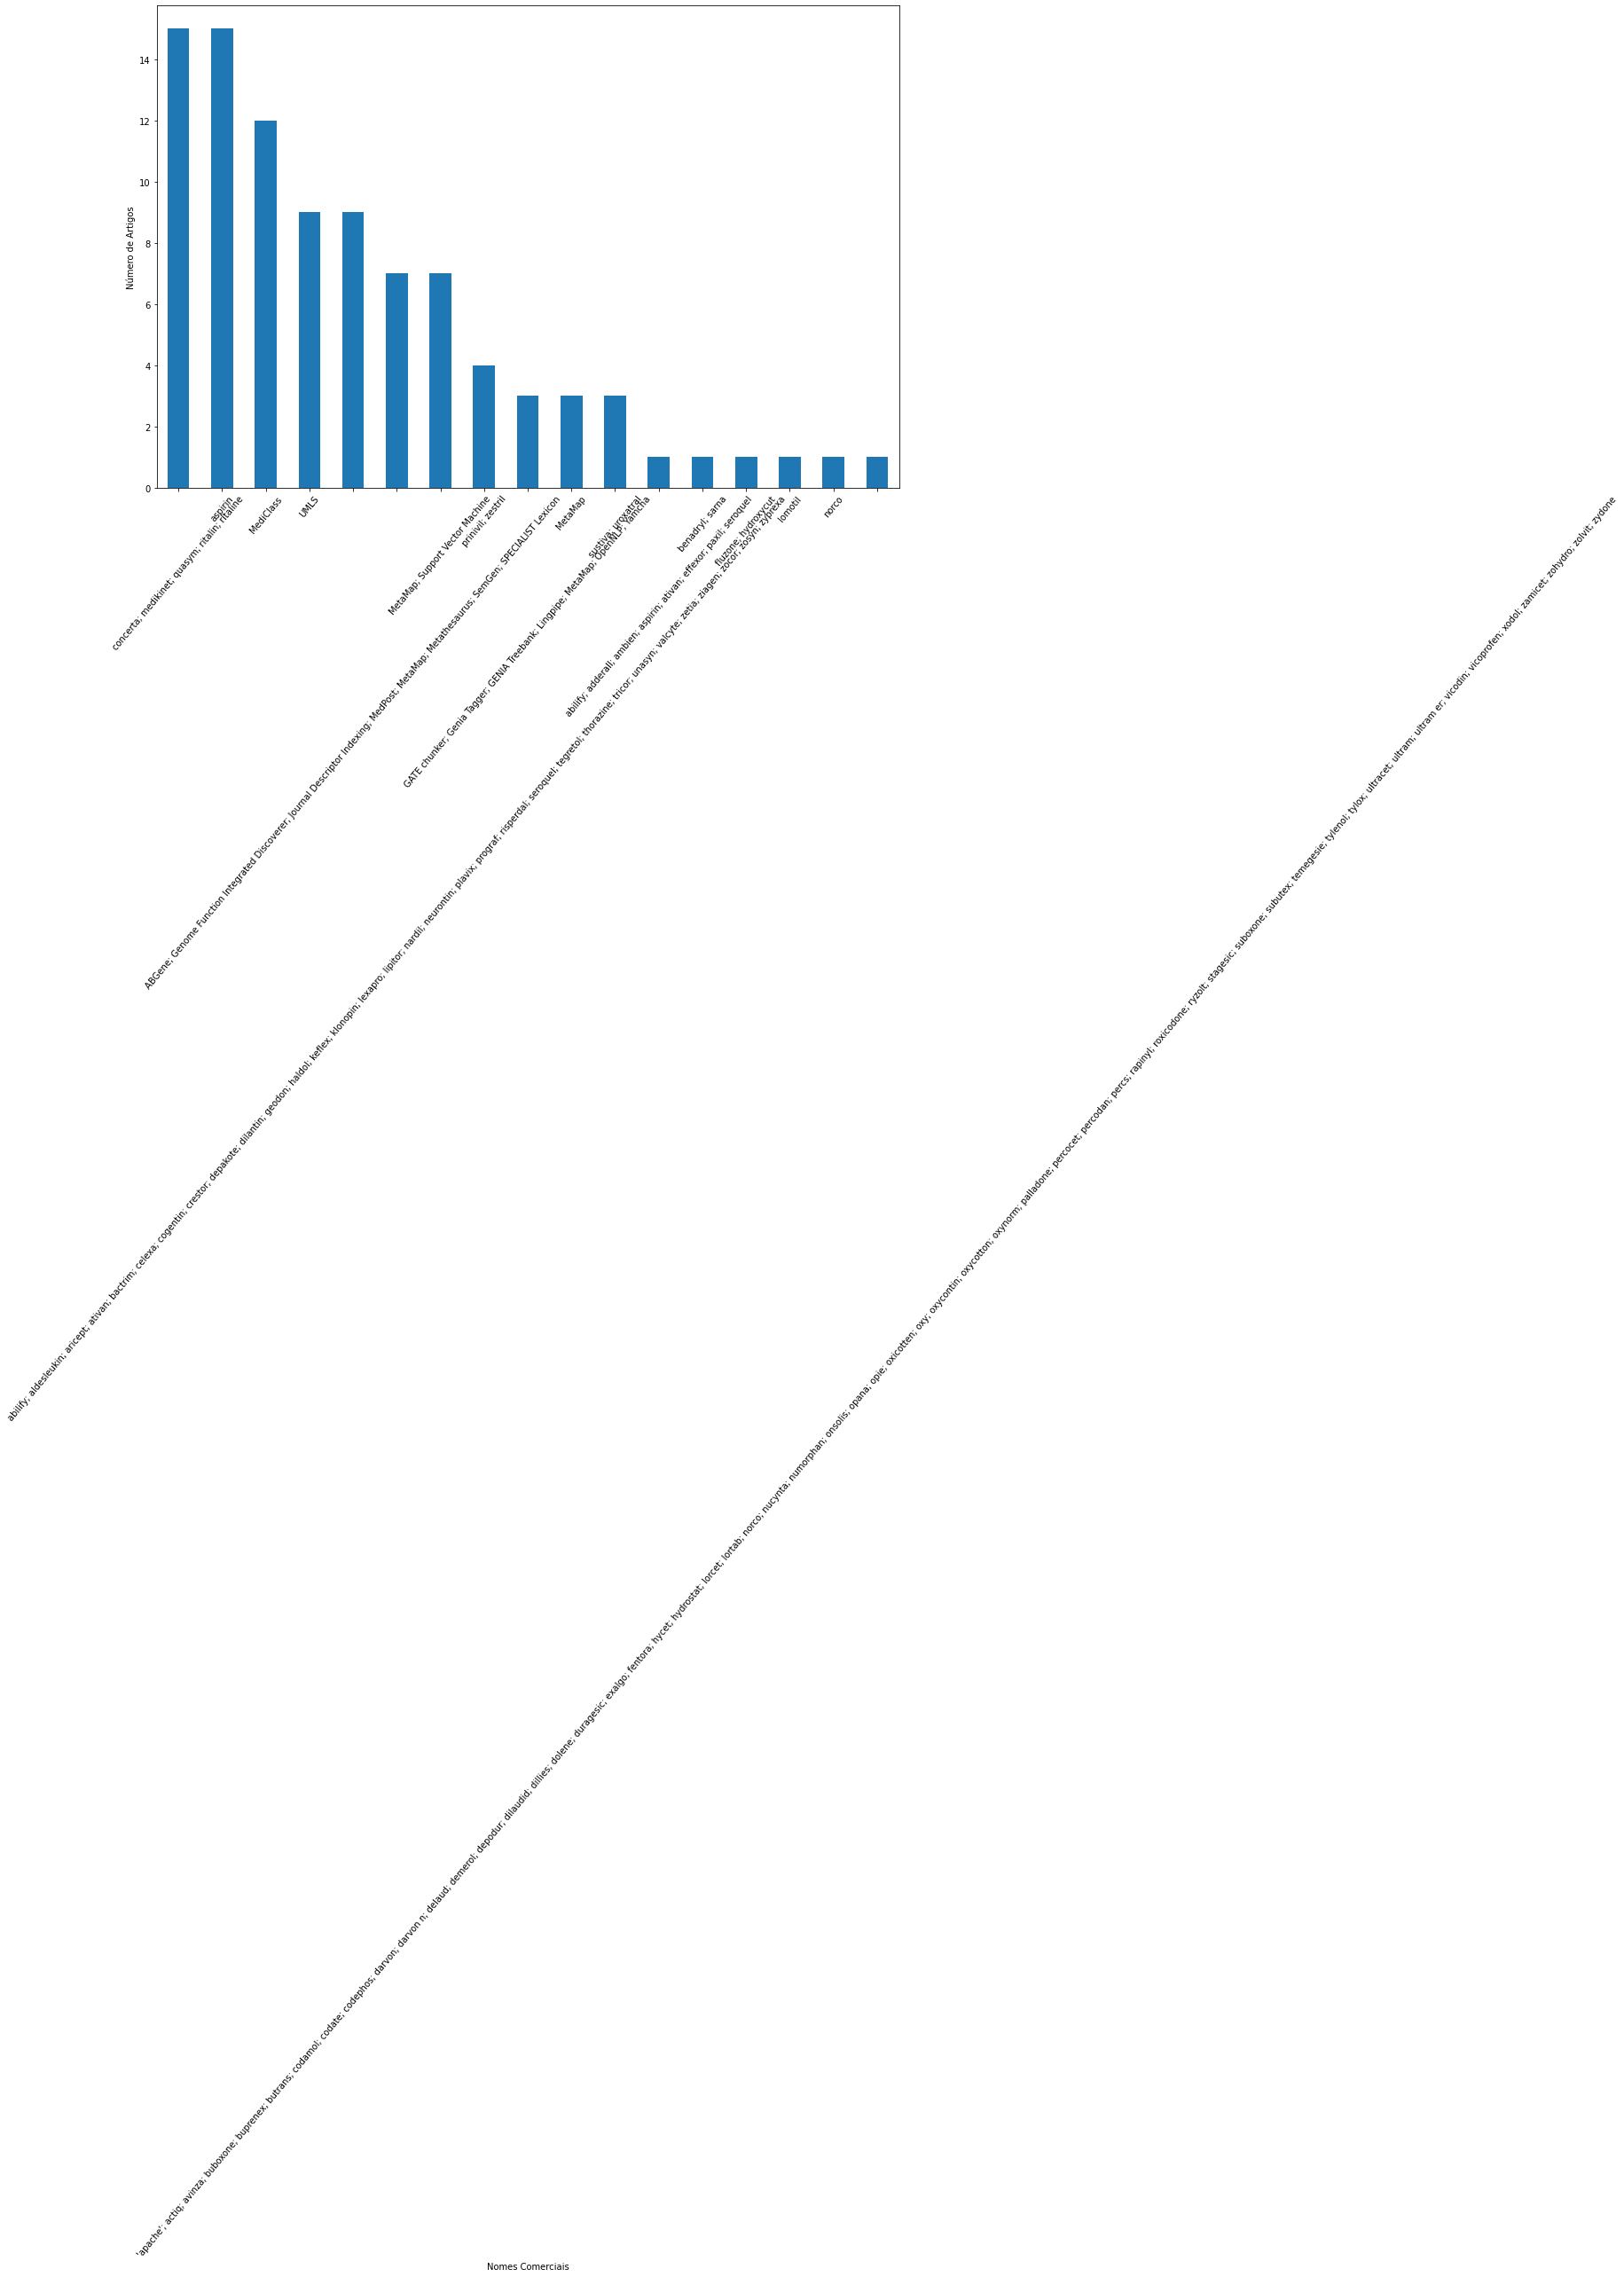

In [157]:
plt.figure(figsize=(15,10))
nomes_comerciais.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Nomes Comerciais")
plt.ylabel("Número de Artigos")
plt.show()

In [158]:
# Groupby by
area_avaliacao = df_bases_e_qualis.groupby("area_avaliacao")

# Summary statistic of all
area_avaliacao.describe().head()

ano_publicacao_scopus  \
                                                                   count   
area_avaliacao                                                             
BIOTECNOLOGIA                                                       72.0   
CIÊNCIA DA COMPUTAÇÃO                                              263.0   
CIÊNCIAS BIOLÓGICAS I                                              124.0   
CIÊNCIAS BIOLÓGICAS II                                              66.0   
CIÊNCIAS BIOLÓGICAS III                                             75.0   

                                                                           \
                                                           mean       std   
area_avaliacao                                                              
BIOTECNOLOGIA                                       2015.819444  3.915755   
CIÊNCIA DA COMPUTAÇÃO                               2015.733840  4.060313   
CIÊNCIAS BIOLÓGICAS I                               2015.782258  3.837260   
CIÊNCIAS BIOLÓGICAS II                              2016.500000  3.625763   
CIÊNCIAS BIOLÓGICAS III                             2016.200000  3.456291   

                                                                            \
                                                       min     25%     50%   
area_avaliacao                                                               
BIOTECNOLOGIA                                       2005.0  2015.0  2017.0   
CIÊNCIA DA COMPUTAÇÃO                               2000.0  2014.0  2017.0   
CIÊNCIAS BIOLÓGICAS I                               2003.0  2014.0  2017.0   
CIÊNCIAS BIOLÓGICAS II                              2005.0  2015.0  2017.0   
CIÊNCIAS BIOLÓGICAS III                             2005.0  2015.0  2017.0   

                                                                     \
                                                        75%     max   
area_avaliacao                                                        
BIOTECNOLOGIA                                       2018.00  2021.0   
CIÊNCIA DA COMPUTAÇÃO                               2019.00  2021.0   
CIÊNCIAS BIOLÓGICAS I                               2018.25  2021.0   
CIÊNCIAS BIOLÓGICAS II                              2019.00  2021.0   
CIÊNCIAS BIOLÓGICAS III                             2018.00  2021.0   

                                                   quantidade_paginas       \
                                                                count mean   
area_avaliacao                                                               
BIOTECNOLOGIA                                                     0.0  NaN   
CIÊNCIA DA COMPUTAÇÃO                                             0.0  NaN   
CIÊNCIAS BIOLÓGICAS I                                             0.0  NaN   
CIÊNCIAS BIOLÓGICAS II                                            0.0  NaN   
CIÊNCIAS BIOLÓGICAS III                                           0.0  NaN   

                                                    ...  \
                                                    ...   
area_avaliacao                                      ...   
BIOTECNOLOGIA                                       ...   
CIÊNCIA DA COMPUTAÇÃO                               ...   
CIÊNCIAS BIOLÓGICAS I                               ...   
CIÊNCIAS BIOLÓGICAS II                              ...   
CIÊNCIAS BIOLÓGICAS III                             ...   

                                                   conceituar_MetamorphoSys  \
                                                                        75%   
area_avaliacao                                                                
BIOTECNOLOGIA                                                           0.0   
CIÊNCIA DA COMPUTAÇÃO                                                   0.0   
CIÊNCIAS BIOLÓGICAS I                                                   0.0   
CIÊNCIAS BIOLÓGICAS II                                     

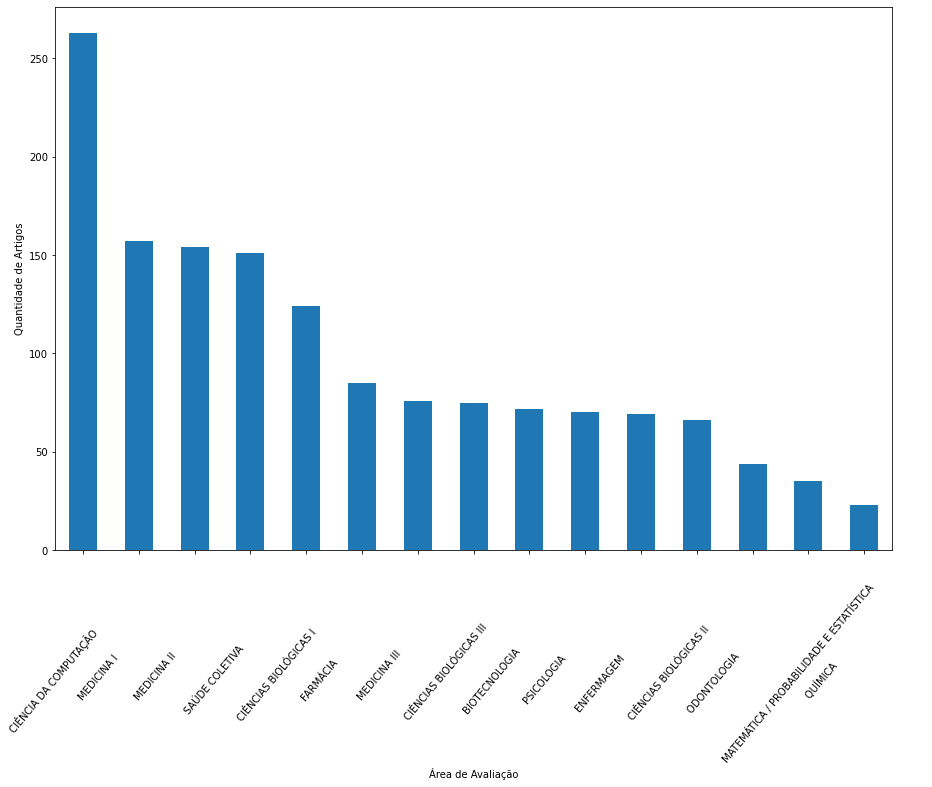

In [159]:
# pegar as 10 +
plt.figure(figsize=(15,10))
area_avaliacao.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Área de Avaliação")
plt.ylabel("Quantidade de Artigos")
plt.show()

### Análise de Titulo Periodico

In [160]:
# Groupby by
titulo_periodico = df_bases_e_qualis.groupby("titulo_periodico")

# Summary statistic of all
titulo_periodico.describe().head()

ano_publicacao_scopus          \
                                                              count    mean   
titulo_periodico                                                              
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING                   6.0  2020.0   
ANNALS OF INTERNAL MEDICINE                                     5.0  2017.0   
APPLIED CLINICAL INFORMATICS                                   12.0  2016.0   
APPLIED SCIENCES                                                3.0  2021.0   
APPLIED SOFT COMPUTING (PRINT)                                  4.0  2020.0   

                                                                          \
                                                    std     min      25%   
titulo_periodico                                                           
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING  0.894427  2019.0  2019.25   
ANNALS OF INTERNAL MEDICINE                    0.000000  2017.0  2017.00   
APPLIED CLINICAL INFORMATICS                   3.692745  2010.0  2015.25   
APPLIED SCIENCES                               0.000000  2021.0  2021.00   
APPLIED SOFT COMPUTING (PRINT)                 1.154701  2019.0  2019.00   

                                                                        \
                                                  50%      75%     max   
titulo_periodico                                                         
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING  2020.0  2020.75  2021.0   
ANNALS OF INTERNAL MEDICINE                    2017.0  2017.00  2017.0   
APPLIED CLINICAL INFORMATICS                   2017.5  2018.25  2019.0   
APPLIED SCIENCES                               2021.0  2021.00  2021.0   
APPLIED SOFT COMPUTING (PRINT)                 2020.0  2021.00  2021.0   

                                              quantidade_paginas       ...  \
                                                           count mean  ...   
titulo_periodico                                                       ...   
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING                0.0  NaN  ...   
ANNALS OF INTERNAL MEDICINE                                  0.0  NaN  ...   
APPLIED CLINICAL INFORMATICS                                 0.0  NaN  ...   
APPLIED SCIENCES                                             0.0  NaN  ...   
APPLIED SOFT COMPUTING (PRINT)                               0.0  NaN  ...   

                                              conceituar_MetamorphoSys       \
                                                                   75%  max   
titulo_periodico                                                              
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING                      0.0  0.0   
ANNALS OF INTERNAL MEDICINE                                        0.0  0.0   
APPLIED CLINICAL INFORMATICS                                       0.0  0.0   
APPLIED SCIENCES                                                   0.0  0.0   
APPLIED SOFT COMPUTING (PRINT)                                     0.0  0.0   

                                              conceituar_NLP                 \
                                                       count mean  std  min   
titulo_periodico                                                              
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING            6.0  0.0  0.0  0.0   
ANNALS OF INTERNAL MEDICINE                              5.0  0.0  0.0  0.0   
APPLIED CLINICAL INFORMATICS                            12.0  0.0  0.0  0.0   
APPLIED SCIENCES                                         3.0  0.0  0.0  0.0   
APPLIED SOFT COMPUTING (PRINT)                           4.0  0.0  0.0  0.0   

                                                                   
                                               25%  50%  75%  max  
titulo_periodico                                                   
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING  0.0  0.0  0.0  0.0  
ANNALS OF INTERNAL MEDICINE                    0

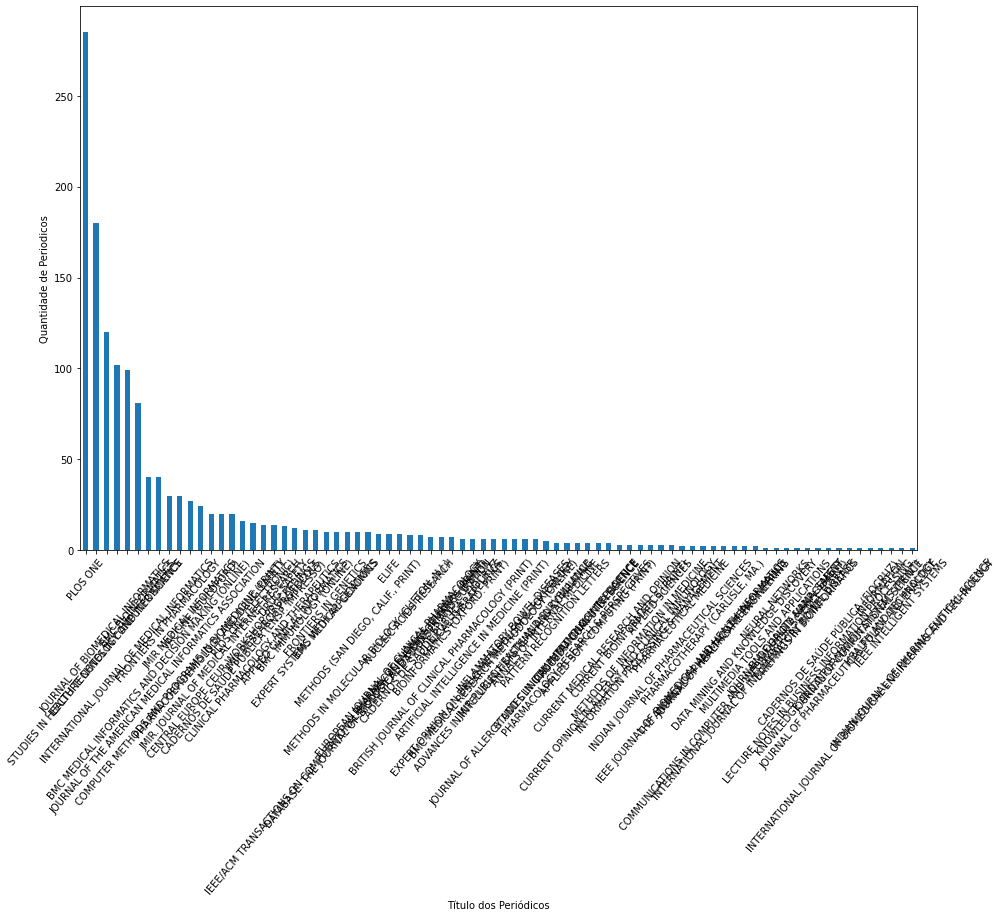

In [161]:
# pegar as 10 +
plt.figure(figsize=(15,10))
titulo_periodico.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Título dos Periódicos")
plt.ylabel("Quantidade de Periodicos")
plt.show()

# Exportação do resultado para Excel

## Planilha Scopus

In [162]:
df_scopus.columns

Index(['autores_scopus', 'id_autores', 'titulo_artigo',
       'ano_publicacao_scopus', 'titulo_fonte', 'volume', 'publicado',
       'numero_artigo', 'inicio_pagina', 'fim_pagina', 'quantidade_paginas',
       'quantidade_citacoes', 'doi_scopus', 'link_scopus', 'afiliacoes',
       'autores_com_filiacoes', 'resumo', 'palavras_chaves_autor',
       'palavras_chave_index', 'numeros_sequencia_molecular', 'quimica',
       'nomes_comerciais', 'fabricantes', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'doi', 'titulo_artigo_scopus',
       'inicio_pagina_', 'fim_pagi

In [163]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_scopus = os.path.join('../data','resultado_scopus.xlsx')
sheetname="base_scopus"


df_xlsx_scopus = pd.DataFrame(df_scopus, columns = [
       'issn_scopus','id_pubmed','titulo_artigo', 'titulo_artigo_scopus', 'ano_publicacao_scopus','quantidade_citacoes',
       'tipo_documento','documentos_6+','documentos_94+',
       'nome_conferencia',
       'autores_scopus','id_autores','editores', 'patrocinadores','editor',
       'titulo_fonte','volume', 'publicado', 'numero_artigo',
       'inicio_pagina', 'fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_',
       'link_scopus','afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'quimica', 'nomes_comerciais',
       'fabricantes',
       'detalhes_financiamento', 'texto_financiamento_1','texto_financiamento_2', 'texto_financiamento_3',
       'referencias', 'endereco_correspondencia', 
       'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'isbn', 'coden',
       'idioma_original', 'titulo_abreviado_fonte', 
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid','doi','doi_scopus' 
    ,])
df_xlsx_scopus = df_xlsx_scopus.to_excel(resultado_scopus, sheet_name=sheetname, index=False, encoding='utf-8', header=True)

C:\Users\luizp\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:943: UserWarning: Ignoring URL 'http://ii.nlm.nih.gov;%20Aronson,%20A.R.,%20Effective%20mapping%20of%20biomedical%20text%20to%20the%20UMLS%20Metathesaurus:%20The%20MetaMap%20program%20(2001)%20Proc.%20AMIA%20Symp.,%20pp.%2017-21;%20Widman,%20L.E.,%20Tong,%20D.A.,%20Requests%20for%20medical%20advice%20from%20patients%20and%20families%20to%20health%20care%20providers%20who%20publish%20on%20the%20World%20Wide%20Web%20(1997)%20Arch.%20Intern.%20Med.,%20157%20(2),%20pp.%20209-212;%20D'Alessandro,%20D.M.,%20D'Alessandro,%20M.P.,%20Colbert,%20S.I.,%20A%20proposed%20solution%20for%20addressing%20the%20challenge%20of%20patient%20cries%20for%20help%20through%20an%20analysis%20of%20unsolicited%20electronic%20mail%20(2000)%20Pediatrics,%20105%20(6),%20p.%2074;%20Smith,%20C.A.,%20Stavri,%20P.,%20Chapman,%20W.W.,%20In%20their%20own%20words?%20a%20terminological%20analysis%20of%20e-mails%20to%20a%20cancer%20information%20service%20(20

## Planilha PubMed

In [164]:
df_pubmed.columns

Index(['id_pubmed', 'titulo_artigo', 'autores_pubmed', 'citacao_pubmed',
       'primeiro_autor_pubmed', 'jornal_book_pubmed', 'ano_publicacao_pubmed',
       'data_criacao_pubmed', 'id_pmc_pubmed', 'id_nihms_pubmed', 'doi_pubmed',
       'fonte', 'doi', 'titulo_artigo_pubmed'],
      dtype='object')

In [165]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_pubmed = os.path.join('../data','resultado_pubmed.xlsx')
sheetname="base_pubmed"

df_xlsx_pubmed = pd.DataFrame(df_pubmed, columns = [
    'id_pubmed', 'titulo_artigo','titulo_artigo_pubmed','ano_publicacao_pubmed','fonte','autores_pubmed', 'citacao_pubmed',
    'primeiro_autor_pubmed', 'jornal_book_pubmed','data_criacao_pubmed',
    'id_pmc_pubmed', 'id_nihms_pubmed', 'doi','doi_pubmed'
    ,])
df_xlsx_pubmed = df_xlsx_pubmed.to_excel(resultado_pubmed,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

## Planilha Bases indexadas filtradas

In [166]:
df_bases_filtrado.columns

Index(['autores_scopus', 'id_autores', 'titulo_artigo',
       'ano_publicacao_scopus', 'titulo_fonte', 'volume', 'publicado',
       'numero_artigo', 'inicio_pagina', 'fim_pagina', 'quantidade_paginas',
       'quantidade_citacoes', 'doi_scopus', 'link_scopus', 'afiliacoes',
       'autores_com_filiacoes', 'resumo', 'palavras_chaves_autor',
       'palavras_chave_index', 'numeros_sequencia_molecular', 'quimica',
       'nomes_comerciais', 'fabricantes', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'doi', 'titulo_artigo_scopus',
       'inicio_pagina_', 'fim_pagi

In [167]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas.xlsx')
sheetname="bases_filtradas"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [
    'id_pubmed','issn_scopus','titulo_artigo','titulo_artigo_scopus','titulo_artigo_pubmed',
    'ano_publicacao_scopus',
    'quantidade_citacoes','documentos_6+','documentos_94+',
    'fonte','jornal_book_pubmed','autores_pubmed','ano_publicacao_pubmed',
    
    'idioma_original','tipo_documento','pdf_baixado', 'acesso_livre',
    'autores_scopus',
    
    'titulo_fonte', 'volume', 'publicado','numero_artigo', 
        
    'doi','doi_scopus', 'doi_pubmed','link_scopus', 'afiliacoes','autores_com_filiacoes',
    
    #'numeros_sequencia_molecular',
    
    'nomes_comerciais', 'fabricantes', 'quimica',
    'detalhes_financiamento','texto_financiamento_1', 'texto_financiamento_2','texto_financiamento_3',
    'referencias', 'endereco_correspondencia',
    'editores', 'patrocinadores', 'editor',
    
    'nome_conferencia','data_conferencia', 'local_conferencia', 'codigo_conferencia','isbn', 'coden', 
    'titulo_abreviado_fonte', 'etapa_publicacao','eid',
    
    #'inicio_pagina', 'fim_pagina', 'quantidade_paginas','inicio_pagina_', 'fim_pagina_',
    
    'quantidade_paginas_',
    
    'data_criacao_pubmed','primeiro_autor_pubmed','id_pmc_pubmed','id_nihms_pubmed','citacao_pubmed',
    
    'palavras_chaves_autor','palavras_chave_index',
    'palavras_chaves_titulo','palavras_chaves_resumo',
    'resumo','leitura_completa', 'leitura_resumo', 'leitura_conclusao','resumo_traduzido'
    'conceituar_metamap','conceituar_farmacovigilancia','conceituar_Reacao_adversa_medicamentos_RAM',
    
    'conceituar_reconhecimento_entidades_nomeadas_REN','conceituar_UMLS','conceituar_metamap_data_file_builder_DFB',
    'conceituar_ferramenta_lexicos_LVG','conceituar_MetamorphoSys','conceituar_NLP','conceituar_outros'
    ,])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

## Planilha bases indexadas fitradas + qualis

In [168]:
df_bases_e_qualis.columns

Index(['autores_scopus', 'id_autores', 'titulo_artigo',
       'ano_publicacao_scopus', 'titulo_fonte', 'volume', 'publicado',
       'numero_artigo', 'inicio_pagina', 'fim_pagina', 'quantidade_paginas',
       'quantidade_citacoes', 'doi_scopus', 'link_scopus', 'afiliacoes',
       'autores_com_filiacoes', 'resumo', 'palavras_chaves_autor',
       'palavras_chave_index', 'numeros_sequencia_molecular', 'quimica',
       'nomes_comerciais', 'fabricantes', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'doi', 'titulo_artigo_scopus',
       'inicio_pagina_', 'fim_pagi

In [169]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_geral = os.path.join('../data','bases_filtradas_e_qualis.xlsx')

df_xlsx = pd.DataFrame(df_bases_e_qualis, columns = 
        ['autores_scopus', 'id_autores', 'titulo_artigo',
       'ano_publicacao_scopus', 'titulo_fonte', 'volume', 'publicado',
       'numero_artigo', 'inicio_pagina', 'fim_pagina', 'quantidade_paginas',
       'quantidade_citacoes', 'doi_scopus', 'link_scopus', 'afiliacoes',
       'autores_com_filiacoes', 'resumo', 'palavras_chaves_autor',
       'palavras_chave_index', 'numeros_sequencia_molecular', 'quimica',
       'nomes_comerciais', 'fabricantes', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'inicio_pagina_', 'fim_pagina_',
       'quantidade_paginas_', 'palavras_chaves_titulo',
       'palavras_chaves_resumo', 'autores_pubmed', 'citar', 'primeiro_autor',
       'jornal_book', 'ano_publicacao_pubmed', 'data_criacao_pubmed', 'id_pmc',
       'id_nihms', 'doi_pubmed', 'issn_qualis', 'titulo_periodico',
       'area_avaliacao', 'estrato', '_merge', 'leitura_resumo',
       'leitura_conclusao', 'leitura_completa'
         ,])
df_xlsx = df_xlsx.to_excel(resultado_geral,index=False, encoding='utf-8', header=True)
#df_xlsx_1 = df_xlsx_1.to_excel(r'C:/Users/luizp/jupyter-notebook/SisCRI-ML/data/REQ-002-publico-alvo-Geral_v6.xlsx',index=True, encoding='utf-8', header=True)

# Analises

In [170]:
data_fim = pd.Timestamp.now()
print(data_inicio)
print(data_fim)

2021-06-19 00:57:15.794591
2021-06-19 00:58:25.418439
